# Dataset Inspectation


  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

#### Attribute information:

   For more information, read [Moro et al., 2014].

   Input variables:
   #### bank client data:
   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single",
   "unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")

   #### related with the last contact of the current campaign:

   8 - contact: contact communication type (categorical: "cellular","telephone")

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

   #### other attributes:

  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

   ##### social and economic context attributes

  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

  17 - cons.price.idx: consumer price index - monthly indicator (numeric)  

  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     

  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):

  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

# Import Libraries
Here i import two libraries across the document i will import others libraries to make more readeble code

In [20]:
import pandas as pd
import numpy as np

# Import DataSet
I am import our dataset with pandas command read_csv, also i am usig `sep=";"` this command spicify separator or delimiter used in CSV file.

Our file `bank-additional-full.csv` seperater by semicomas rather than commas. So to corrcetly indetify the boundaries we need to use `sep=';'` command.

`data.head()` command we ensure that our dataset is working corrcetly and we dispaly firs 5 rows

In [21]:
data = pd.read_csv('./bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Brief DataSet Overview
- **Personal Information**: Attributes like: `age`, `job`, `marital`, `education`, `status`, `educagtion` and wheter individual has `default`, `housig` or `loan`

- **Conact Information**: The type of `contact` (e.g telephone), the `month` and `day_of_week` or the last contact

- **Campaign Information**: Details of the campaign like the `campaign` number, `pdays`, `previous` contacts, and `poutcome`

- **Economic Context**: Economic indicators such as `emp.var.rate` (employment variation rate), `cons.price.idx` (consumer price index), `cons.conf.idx` (consumer confidence index), `euribor3m` (euribor 3 month rate), and `nr.employed` (number of employees)

- **Target Variable**: `y`, indicating whether the client subscribed to a term deposit or not.

# Helpers
In this section i created a helpers functions to make `DRY`Principle(Don't Repeat Yourself)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

### Helper for Plots
Here i crete a function for plotting a plot of two variabels

In [23]:
def plot_data(x, y=None, plot_type='scatter', title="Daat Plot", xlabel='X-axis', ylabel='Y-axis',color='g', **kwargs):
  plt.figure(figsize=(8, 6))
  if plot_type == 'scatter':
    plt.scatter(x, y, color=color)
  elif plot_type == 'line':
    plt.plot(x, y, color=color)
  elif plot_type == 'bar':
    plt.bar(x, y, color=color)
  elif plot_type == 'box':
    if isinstance(data, pd.DataFrame):
      sns.boxplot(data=data, **kwargs)
    else:
      sns.boxplot(y=data, **kwargs)
  elif plot_type == 'hist':
    plt.hist(x, bins=y, color=color)
  else:
    raise ValueError("Invalid plot type. Choose 'scatter', 'line', or 'bar'.")
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(True)
  plt.show

Here i crete a function for plotting a plot for heatmap used seaborn library

In [24]:
def plot_heatmap(data, title='Heatmap', cmap='coolwarm', figsize=(8, 6)):
    plt.figure(figsize=figsize)
    sns.heatmap(data, annot=True, cmap=cmap)
    plt.title(title)
    plt.show()

# Part 1: EDA (30% max)
Explore the data:
- Univariate analysis: consider features separately, their distribution, descriptive statistics, anomalies, omissions, etc. (15%)
- Multivariate analysis: consider features in pairs, try to introduce new features to consider their relationship with other features, correlation, etc. (15%)





## Univariate analysis
This involves alalyzing each feature individually to undestrand their distribution, descriptive statistics, identify anomalies or missing values

In [25]:
# Basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [26]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [27]:
#Descriptive statistics for numerical features
descriptive_stats_numerical = data[numerical_features].describe()
descriptive_stats_numerical

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Descriptive statistics

- `age`: Varies between 17 to 98 years, with a mean of approximately 40 years.

- `duration`: Ranges widely from 0 to 4918 seconds (approx. 82 minutes), indicating the length of the last contact. The mean duration is about 258 seconds.

- `campaign`: Number of contacts performed during this campaign, ranging from 1 to 56.

- `pdays`: Number of days that passed by after the client was last contacted, with 999 indicating client was not previously contacted. Majority are 999.(Possibly anomalie)

- `previus`: Number of contacts performed before this campaign, mostly 0 (no previous contacts).

- **Economic features** (`emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`): Show varying ranges, depicting different economic conditions.


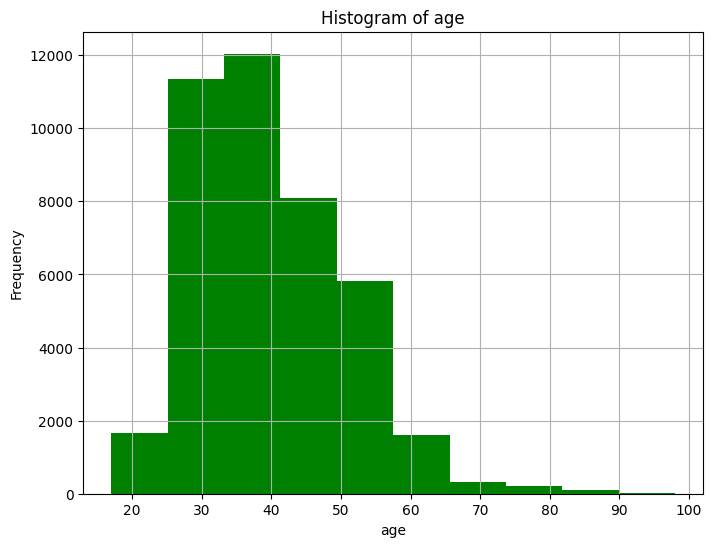

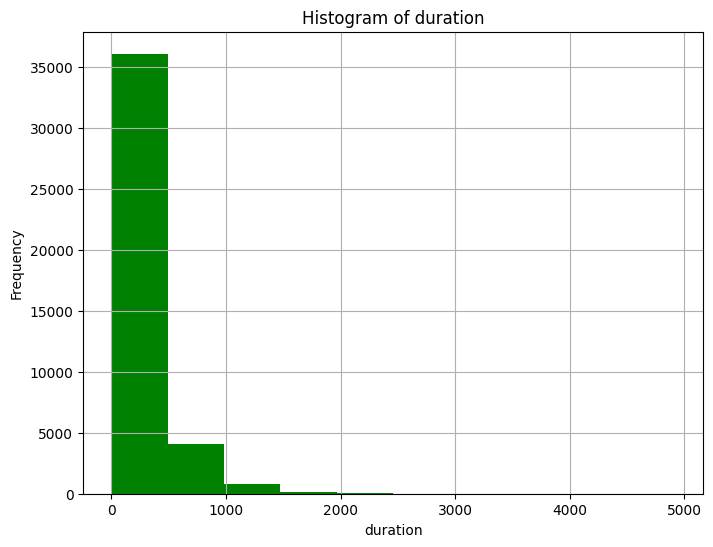

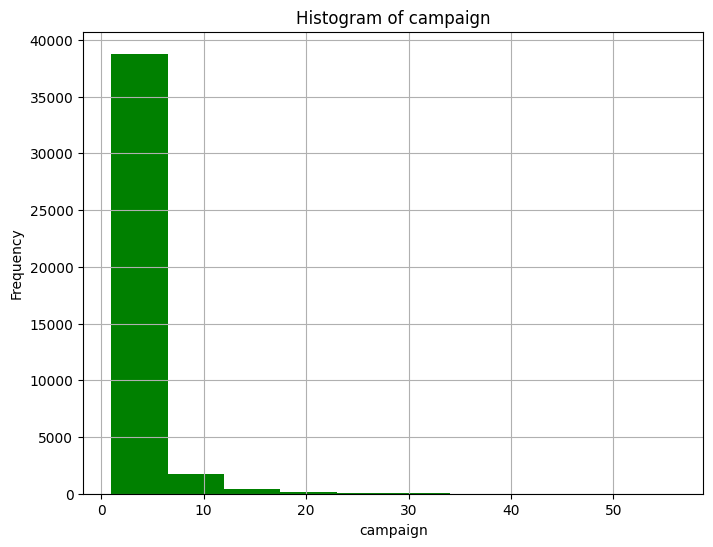

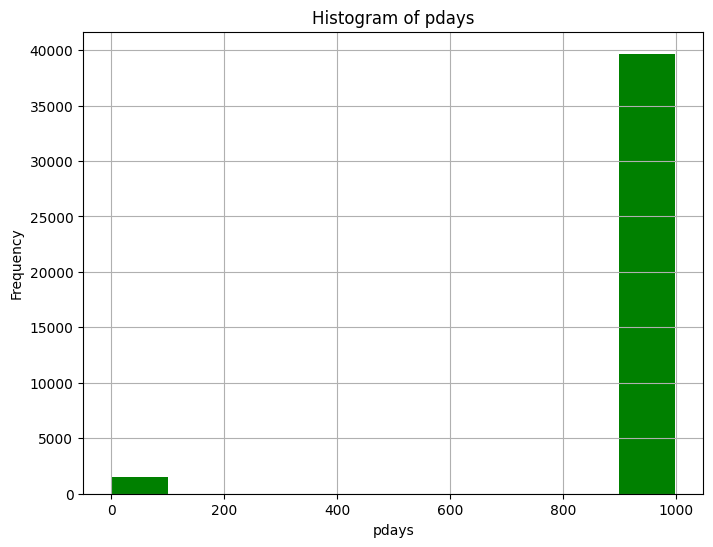

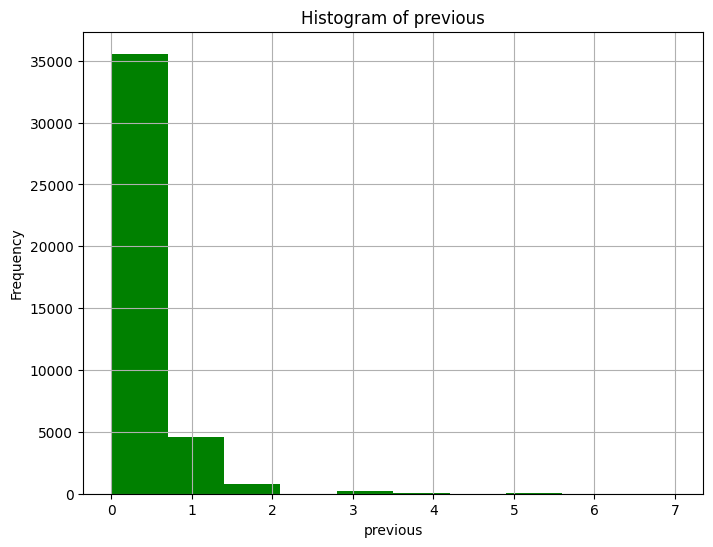

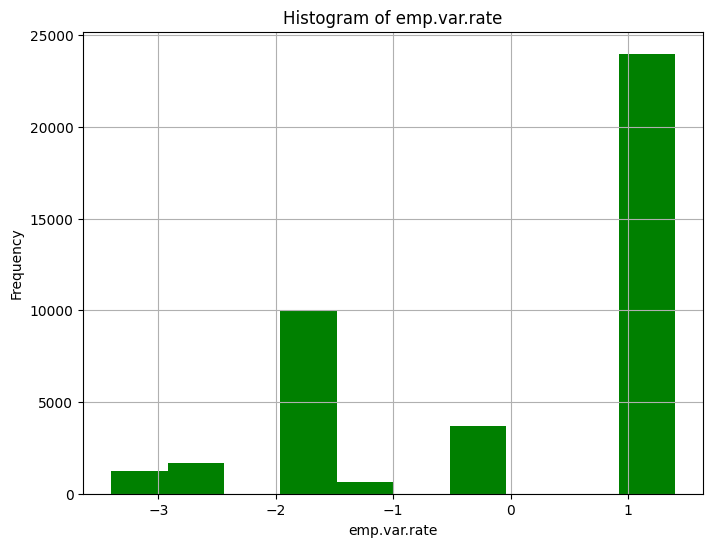

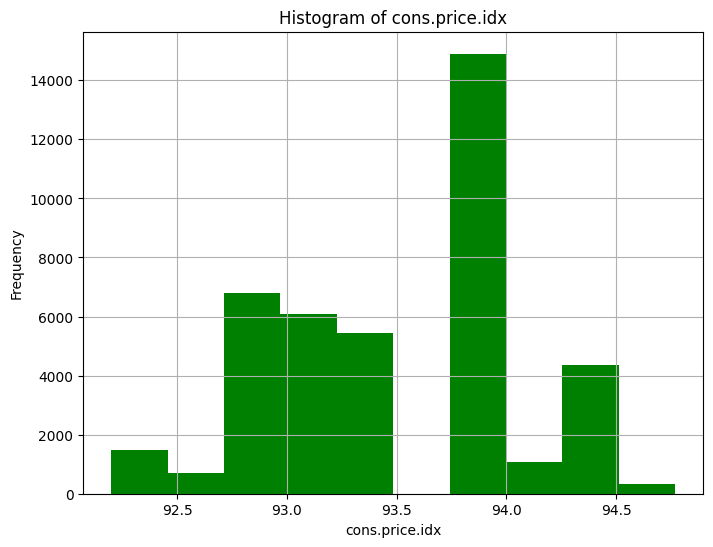

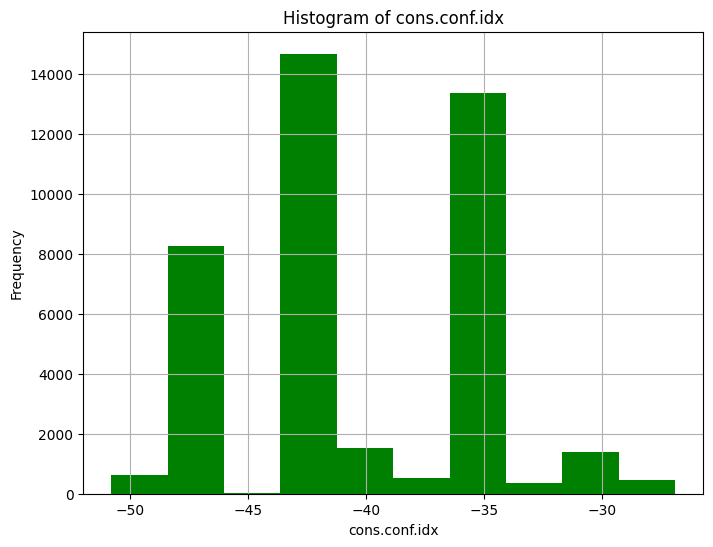

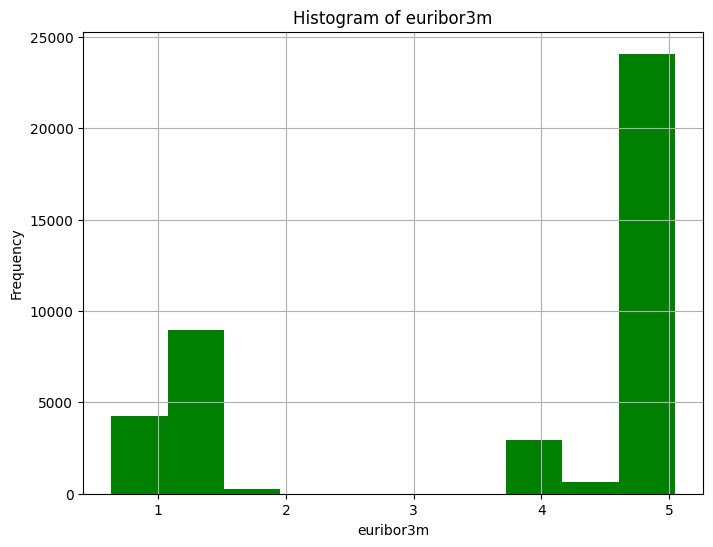

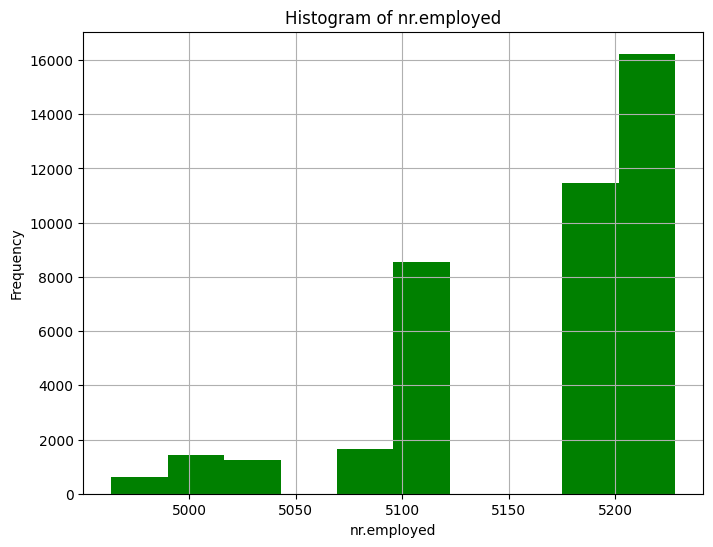

In [28]:
for feature in numerical_features:
    plot_data(data[feature], y=None, plot_type='hist', title=f"Histogram of {feature}", xlabel=feature, ylabel="Frequency")

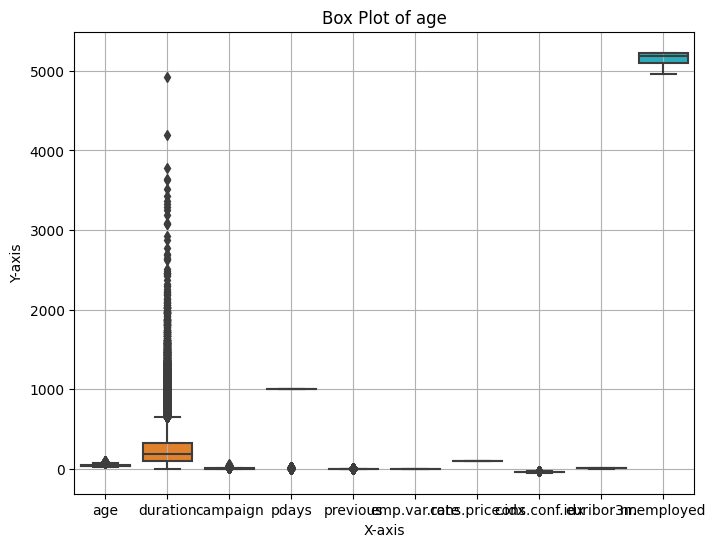

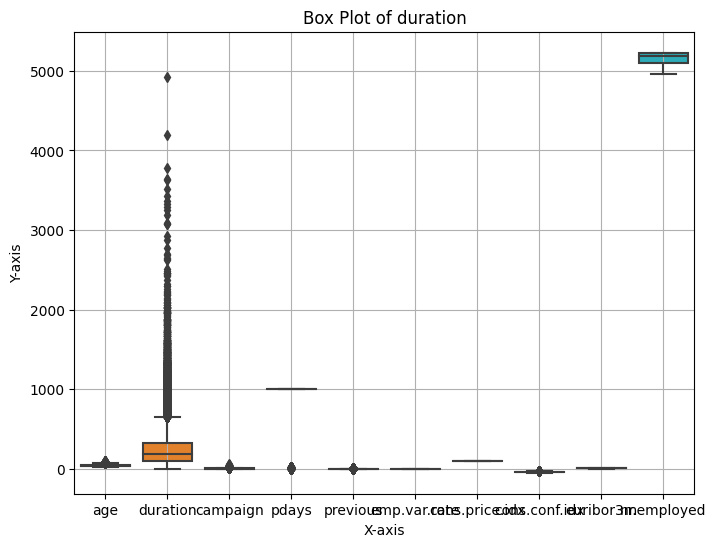

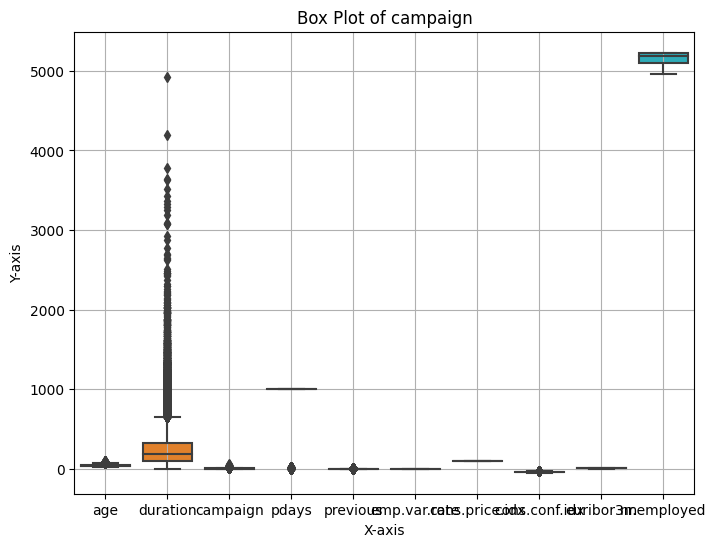

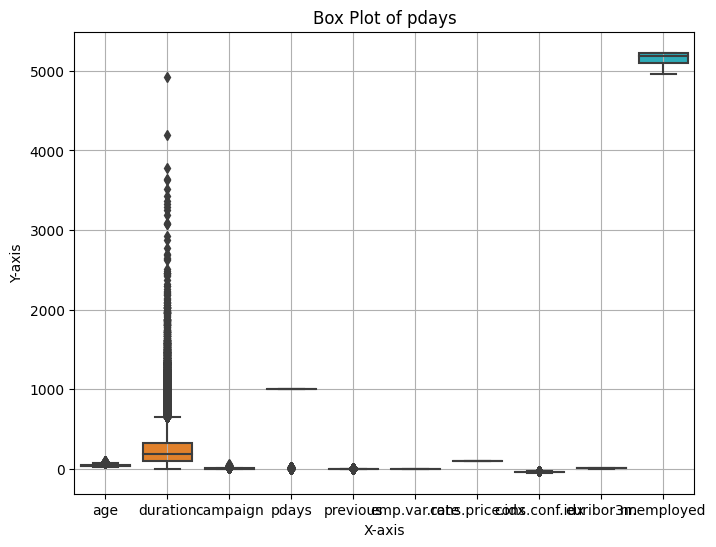

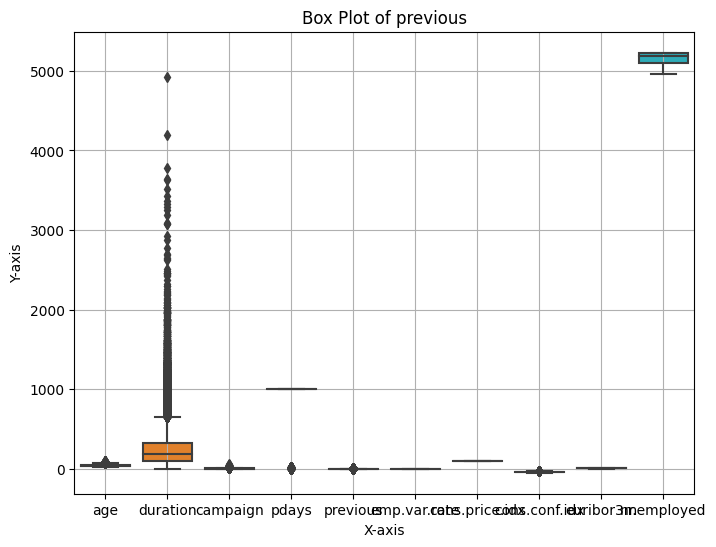

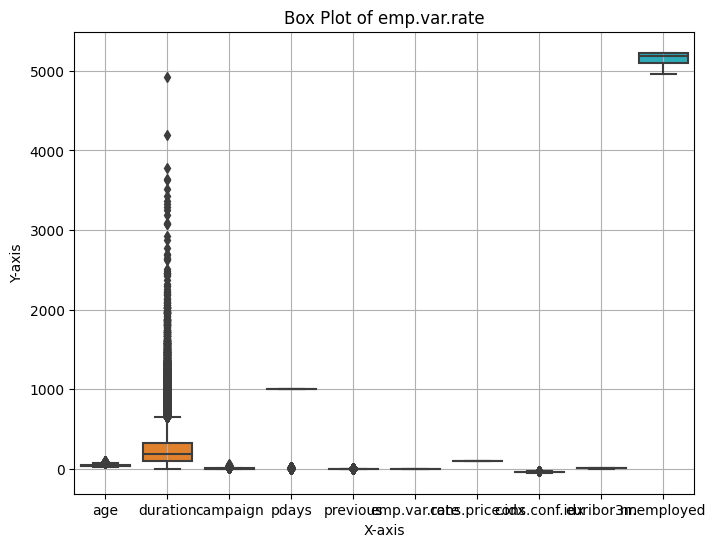

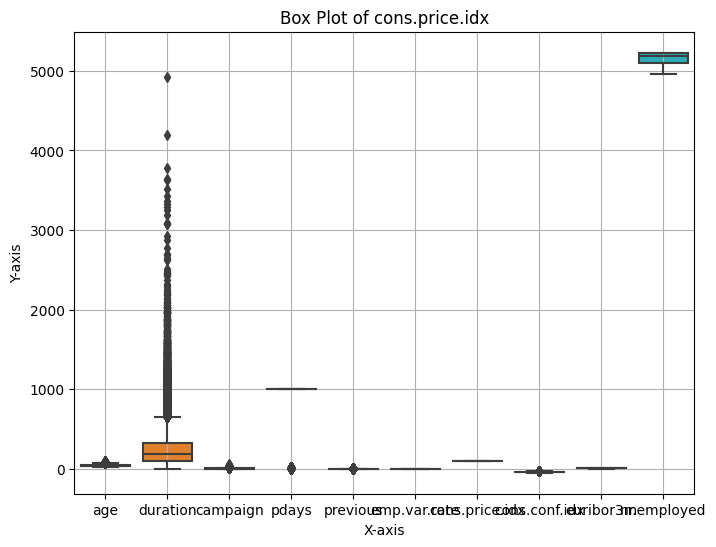

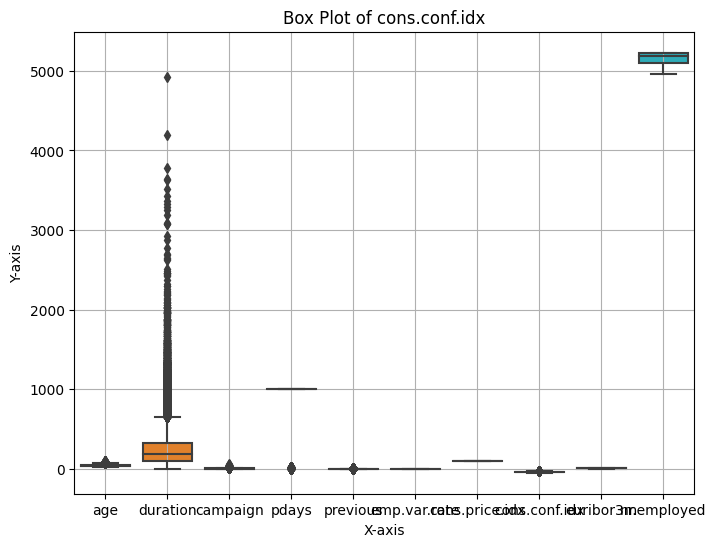

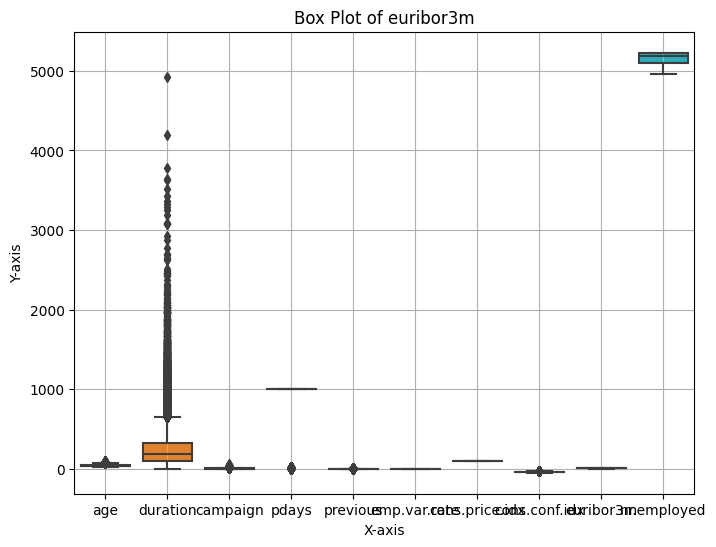

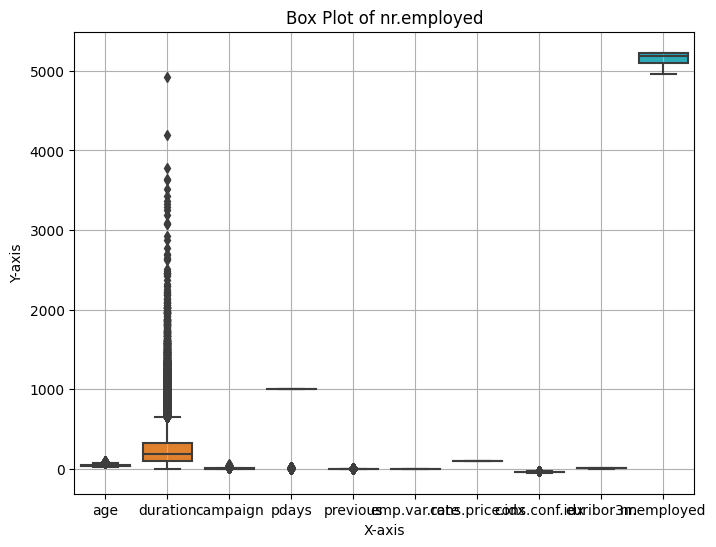

In [29]:
for feature in numerical_features:
    plot_data(data[feature], plot_type='box', title=f"Box Plot of {feature}")

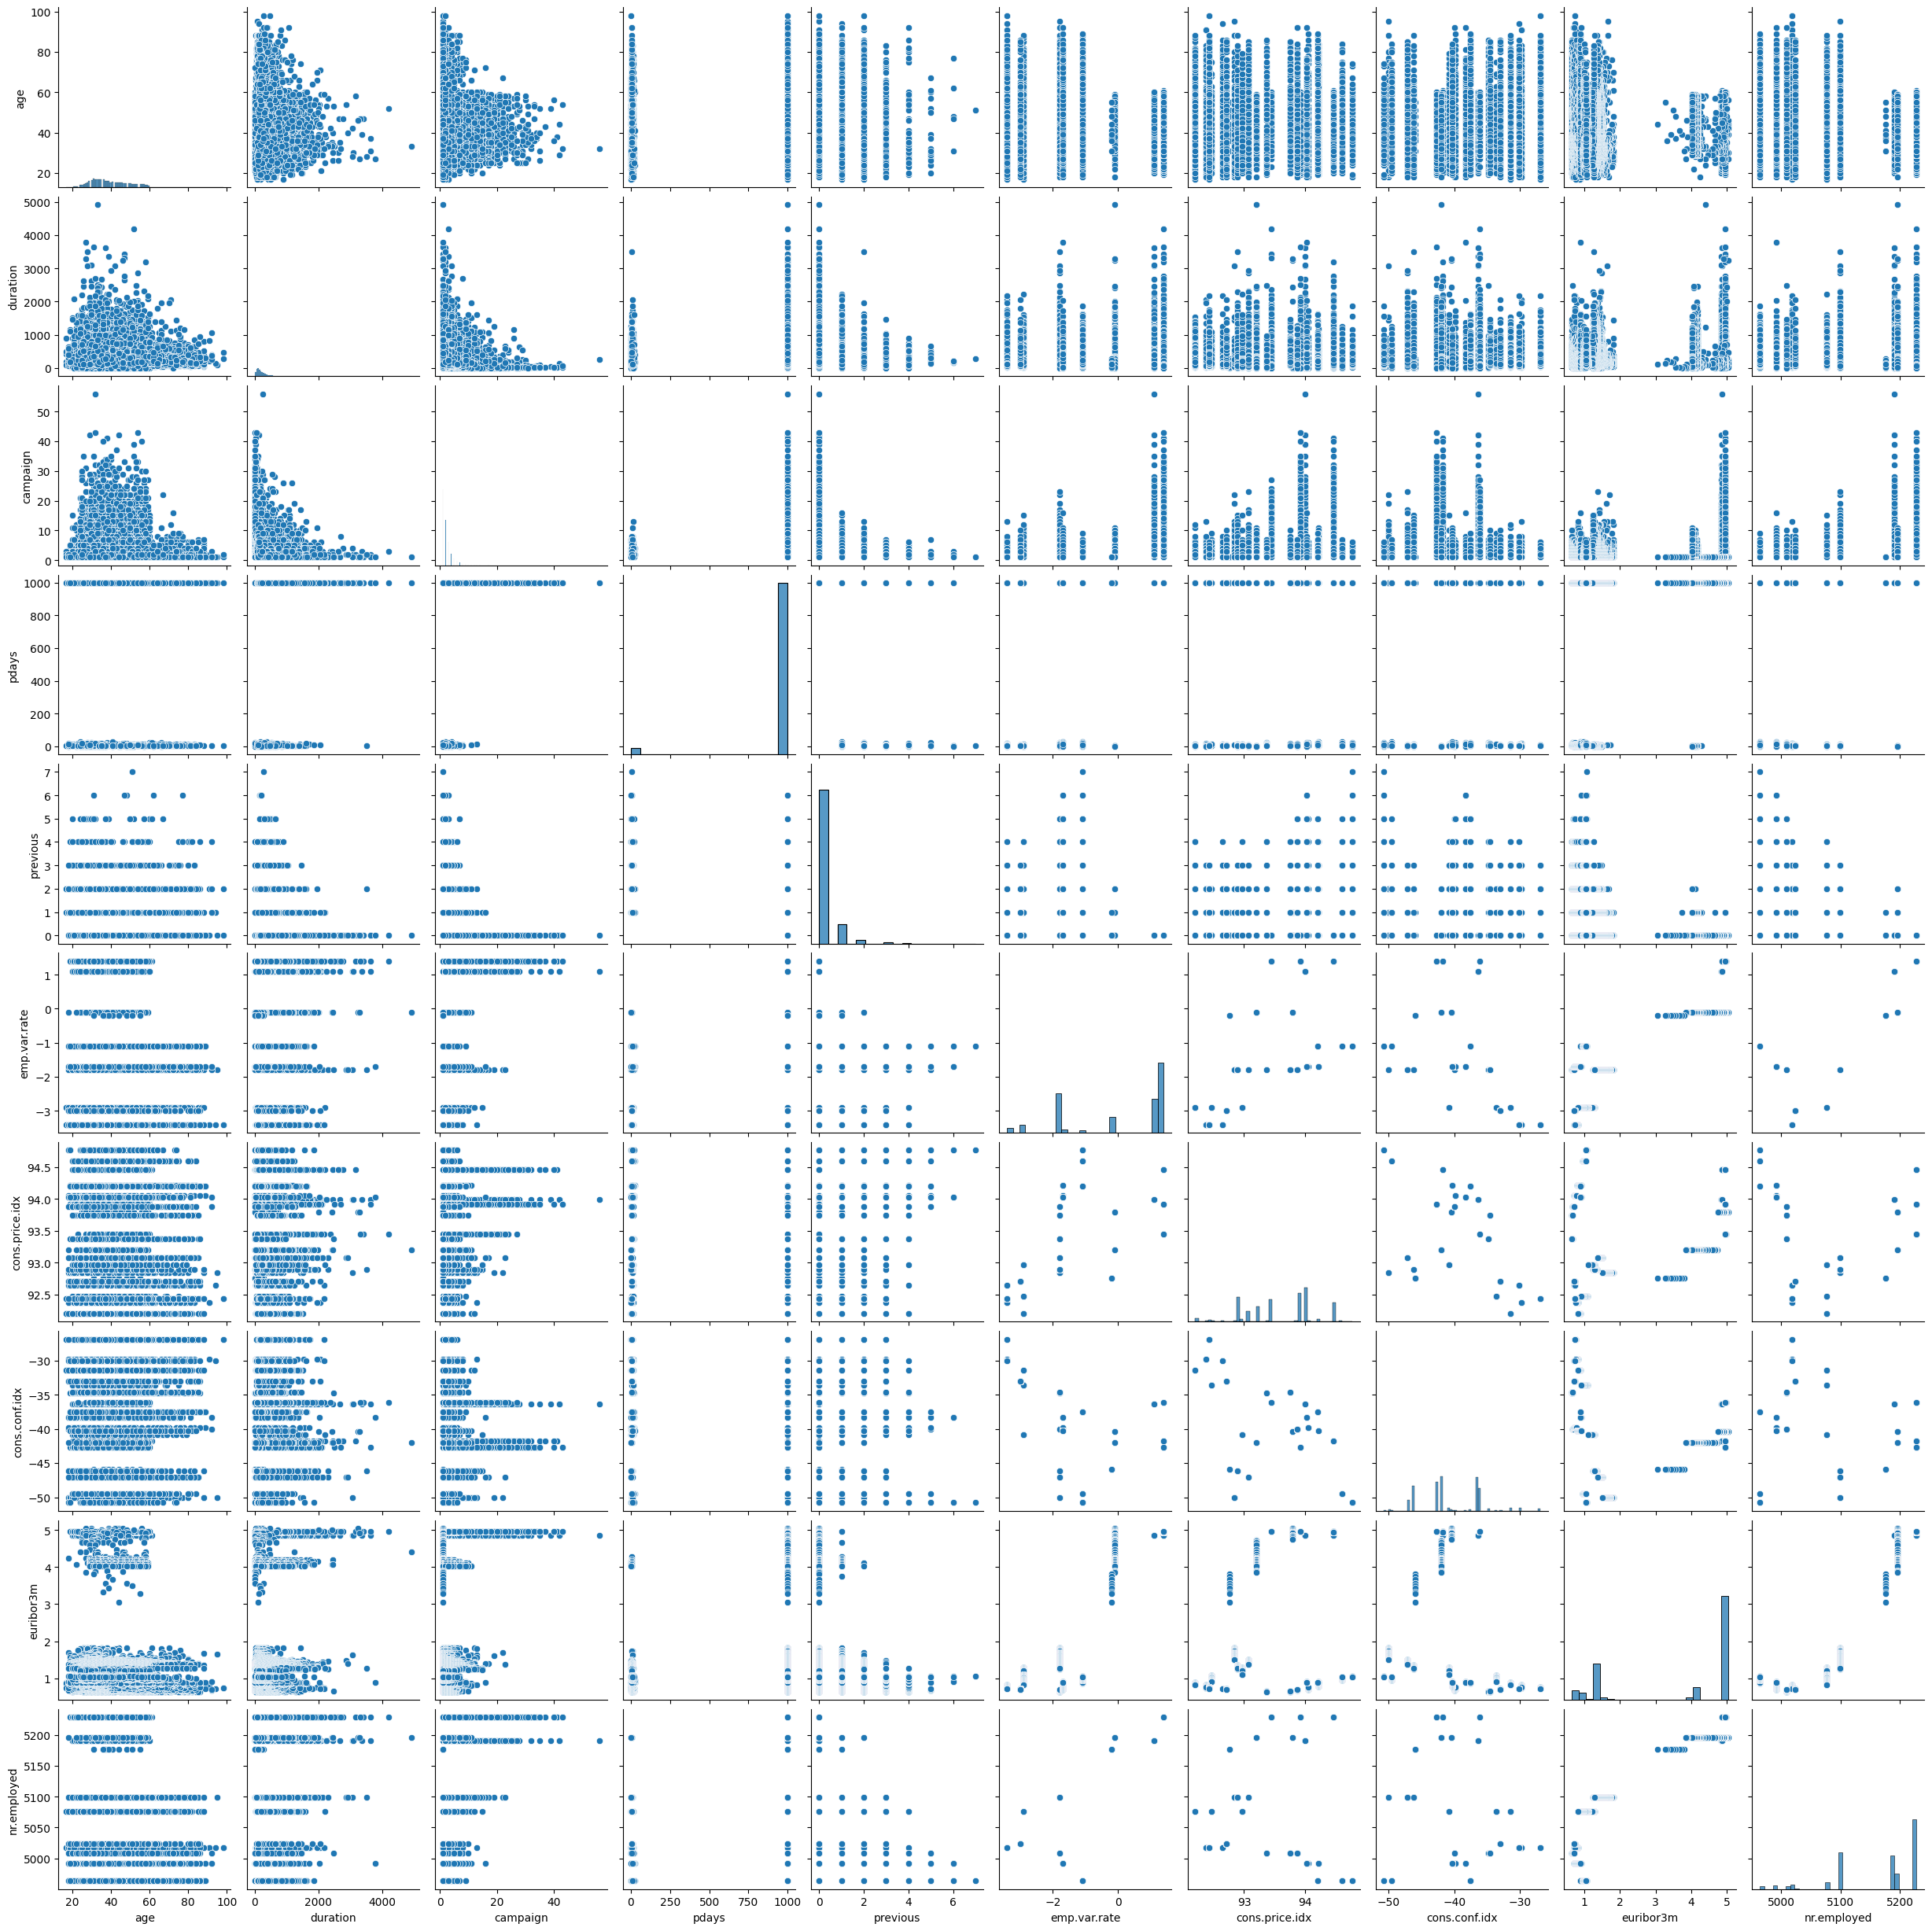

In [30]:
sns.pairplot(data)
plt.show()

In [31]:
categorical_features = data.select_dtypes(include=['object'])
categorical_features

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [32]:
# Frequency distribution for categorical features
frequency_distribution_categorical = {feature: data[feature].value_counts() for feature in categorical_features}

# Displaying the first few entries for each categorical feature
{feature: freq.head() for feature, freq in frequency_distribution_categorical.items()}

{'job': admin.         10422
 blue-collar     9254
 technician      6743
 services        3969
 management      2924
 Name: job, dtype: int64,
 'marital': married     24928
 single      11568
 divorced     4612
 unknown        80
 Name: marital, dtype: int64,
 'education': university.degree      12168
 high.school             9515
 basic.9y                6045
 professional.course     5243
 basic.4y                4176
 Name: education, dtype: int64,
 'default': no         32588
 unknown     8597
 yes            3
 Name: default, dtype: int64,
 'housing': yes        21576
 no         18622
 unknown      990
 Name: housing, dtype: int64,
 'loan': no         33950
 yes         6248
 unknown      990
 Name: loan, dtype: int64,
 'contact': cellular     26144
 telephone    15044
 Name: contact, dtype: int64,
 'month': may    13769
 jul     7174
 aug     6178
 jun     5318
 nov     4101
 Name: month, dtype: int64,
 'day_of_week': thu    8623
 mon    8514
 wed    8134
 tue    8090
 fri    782

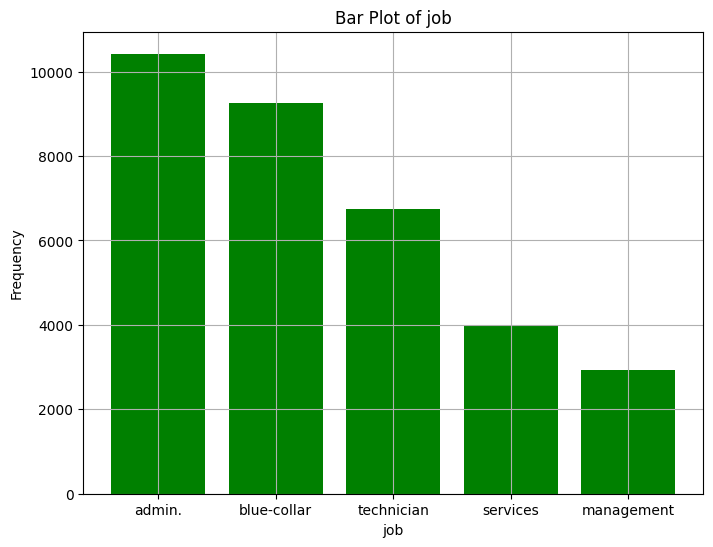

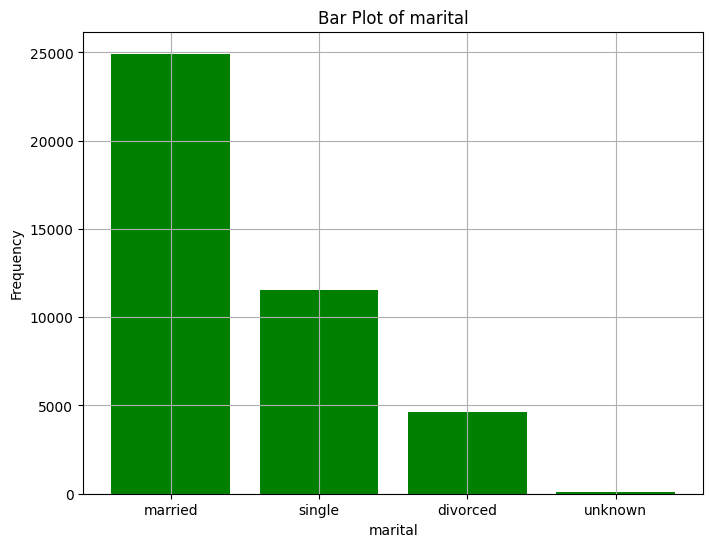

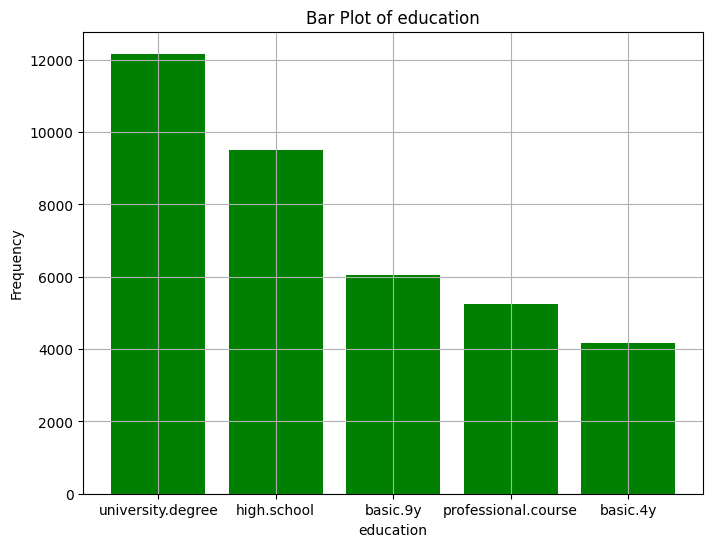

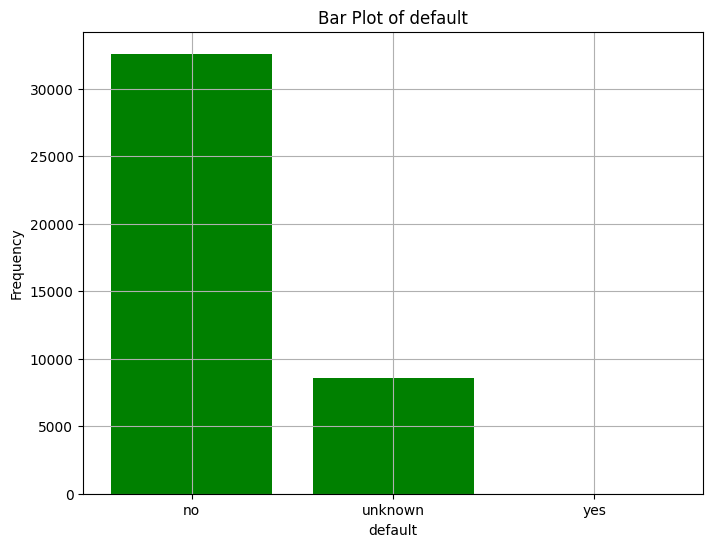

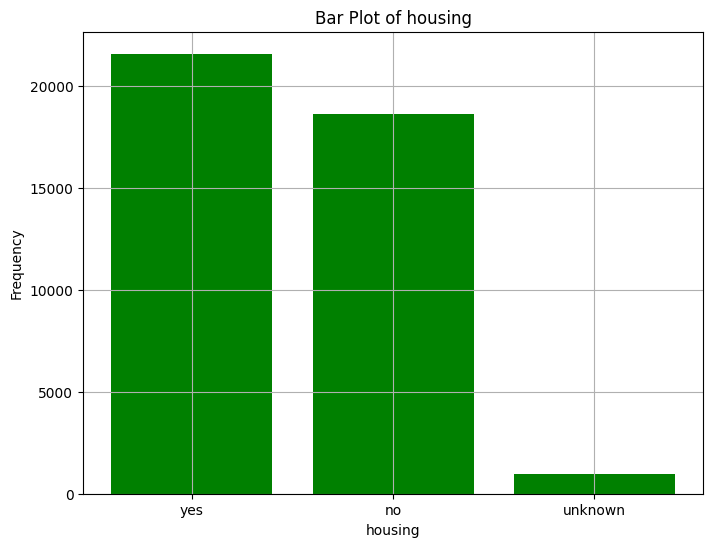

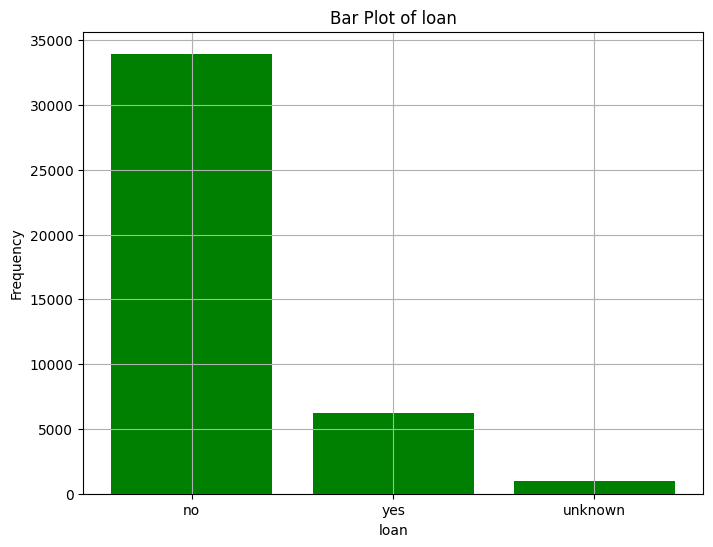

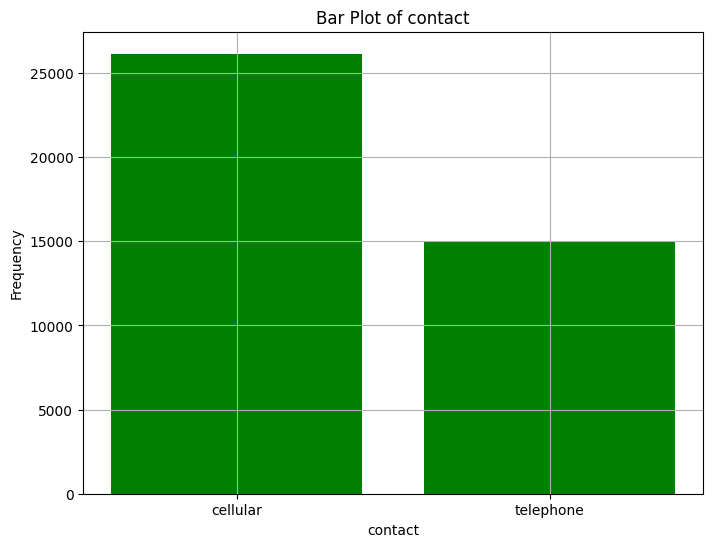

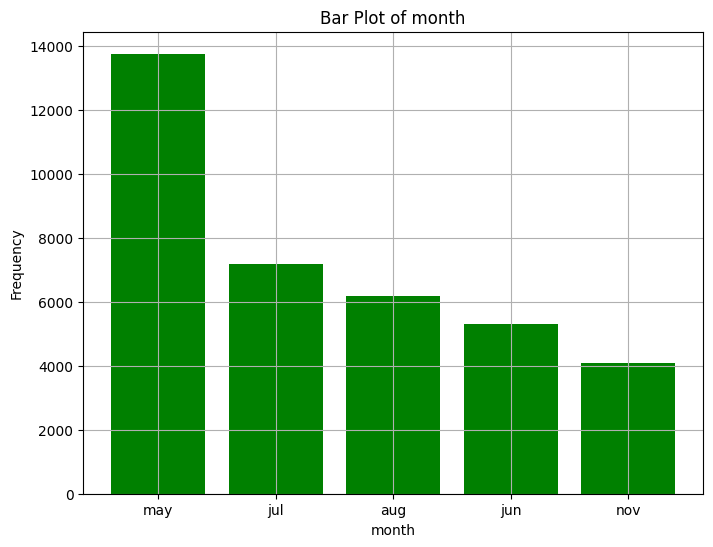

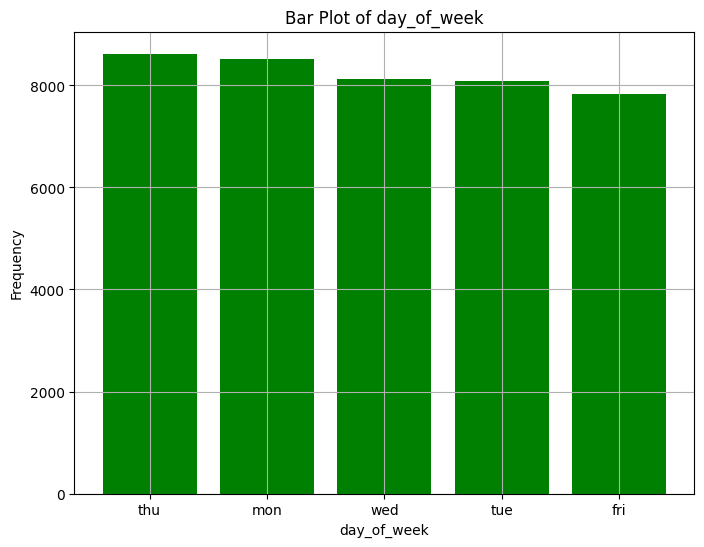

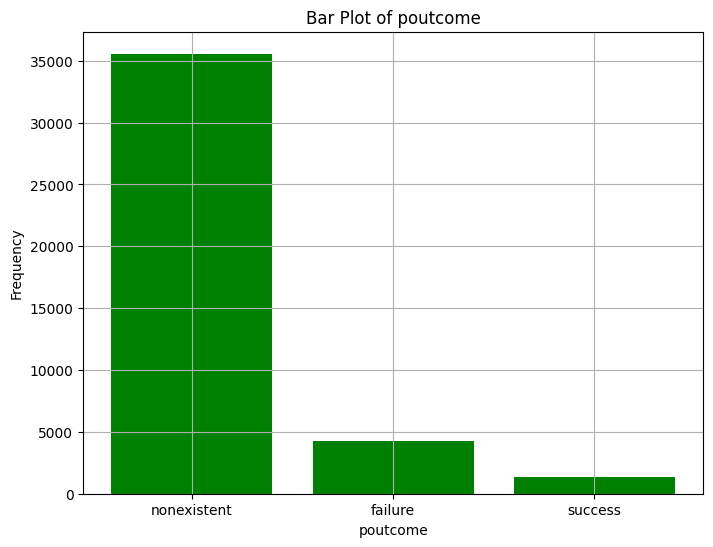

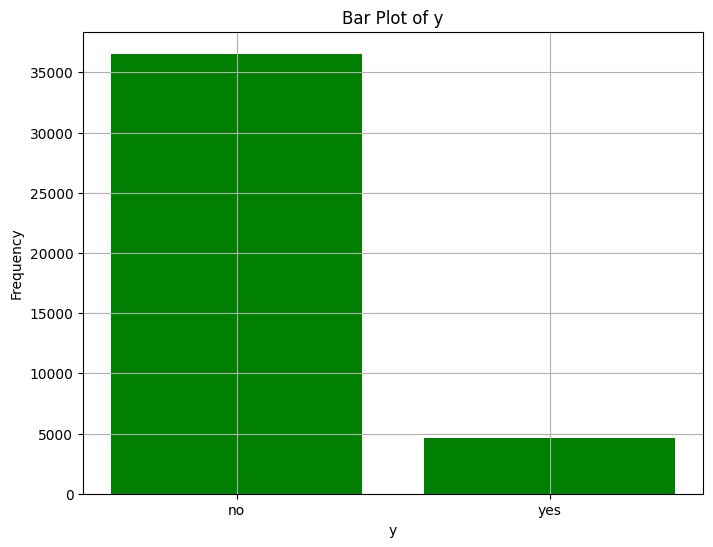

In [33]:
# Plotting bar plots for the top categories in each categorical feature
for feature, freq in frequency_distribution_categorical.items():
    top_categories = freq.head(5)  # Selecting top 5 categories for simplicity
    plot_data(top_categories.index, top_categories.values, plot_type='bar', title=f"Bar Plot of {feature}", xlabel=feature, ylabel="Frequency")


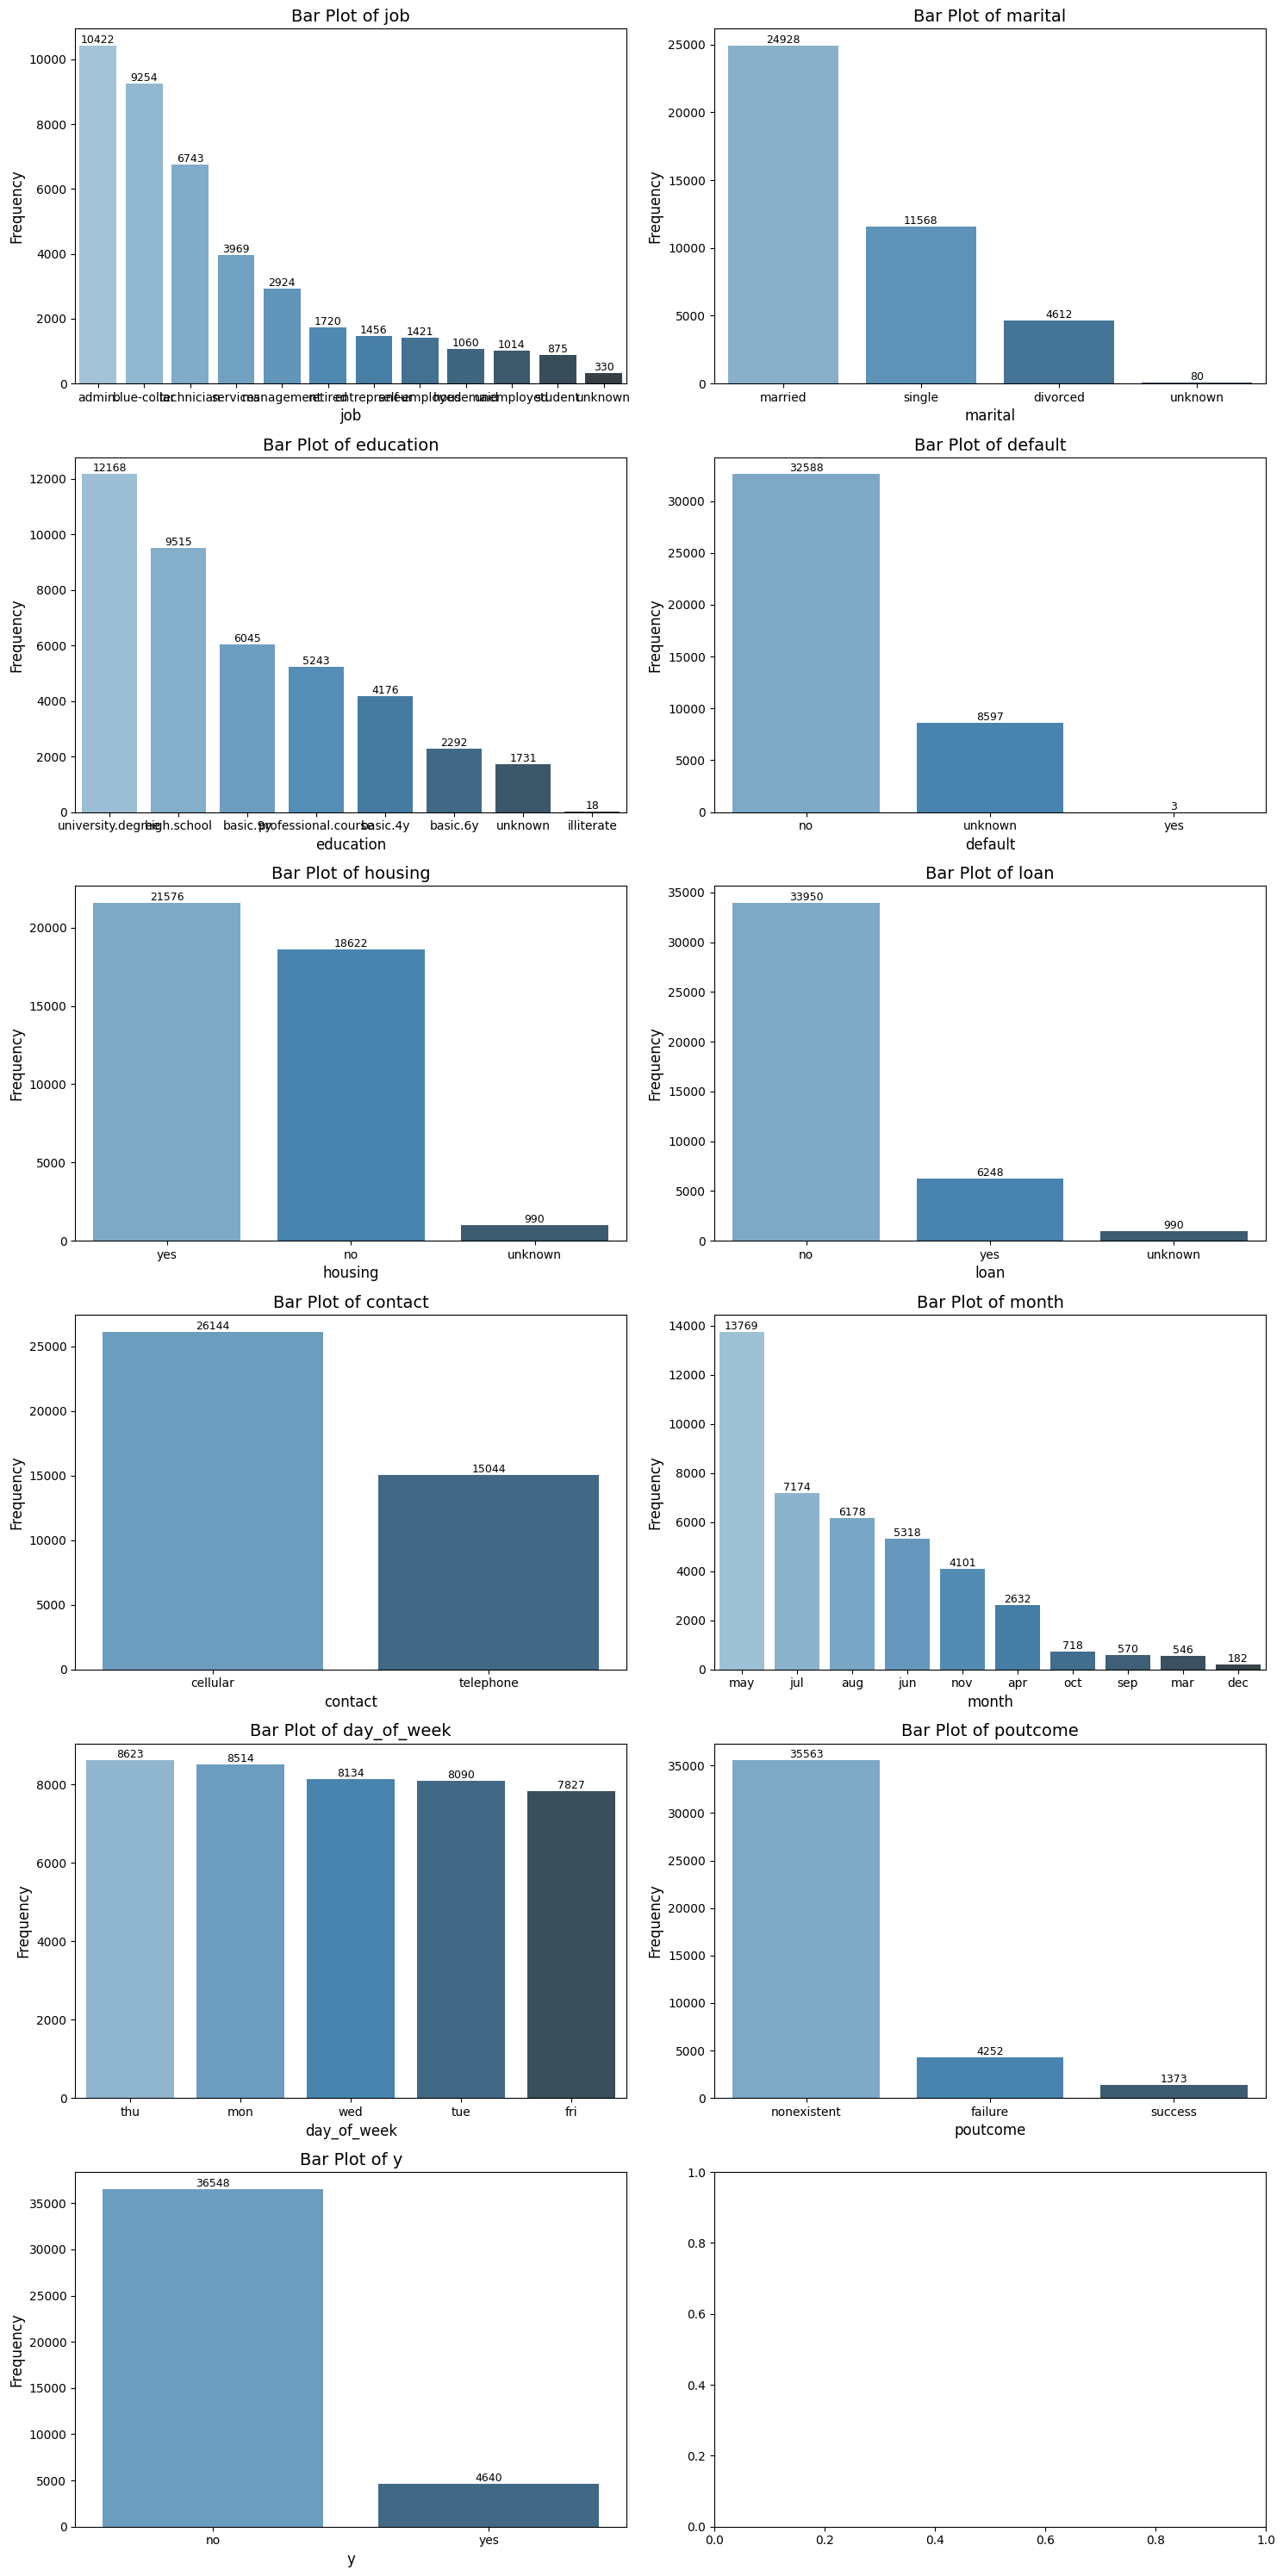

In [34]:
# Recreating bar plots with Seaborn, considering 'freq' as a Pandas Series
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 30))
axes = axes.flatten()  # Flattening the array for easy iteration

for i, (feature, freq) in enumerate(frequency_distribution_categorical.items()):
    categories = freq.index
    values = freq.values

    sns.barplot(x=categories, y=values, ax=axes[i], palette="Blues_d")
    axes[i].set_title(f"Bar Plot of {feature}", fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

    # Adding data labels on top of each bar
    for j, value in enumerate(values):
        axes[i].text(j, value, str(value), ha='center', va='bottom', fontsize=9)

# Adjust layout
plt.tight_layout()
plt.show()

#### Missing values


In [35]:
missing_values = data.isnull().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [36]:
categorical_col = data.select_dtypes(include=['object']).columns
categorical_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [37]:
non_standard_missing_values = {}
for col in categorical_col:
  counts = data[col].value_counts(dropna=False)
  non_standard_missing = counts[counts.index.isin(['unknown'])]
  if not non_standard_missing.empty:
    non_standard_missing_values[col] = non_standard_missing
non_standard_missing_values

{'job': unknown    330
 Name: job, dtype: int64,
 'marital': unknown    80
 Name: marital, dtype: int64,
 'education': unknown    1731
 Name: education, dtype: int64,
 'default': unknown    8597
 Name: default, dtype: int64,
 'housing': unknown    990
 Name: housing, dtype: int64,
 'loan': unknown    990
 Name: loan, dtype: int64}

We found missing values labled as `unknown` in several categorical columns:
- `job` 330 instances
-  `marital`: 80 instances.
- `education`: 1731 instances
- `default`: 8597 instances
- `housing`: 990 instances
- `loan`: 990 instances

### Skewness and Kurtosis
-     Skewness measures the asymmetry of the probability distribution of a real-valued random variable. A distribution is:
  - Positively skewed if the tail is on the right side.
  - Negatively skewed if the tail is on the left side.
  -  Symmetric if skewness is close to 0.

- Kurtosis measures the "tailedness" of the probability distribution. It shows how heavy or light the tails of the distribution are compared to a normal distribution. Higher kurtosis indicates a distribution with heavier tails.

In [38]:
from scipy.stats import skew, kurtosis

In [39]:
skewness_kurtosis = {
    "Feature": [],
    "Skewness": [],
    "Kurtosis": []
}

for feature in numerical_features:
    skewness_kurtosis["Feature"].append(feature)
    skewness_kurtosis["Skewness"].append(skew(data[feature]))
    skewness_kurtosis["Kurtosis"].append(kurtosis(data[feature], fisher=False)) # Fisher=False for Pearson's definition

skewness_kurtosis_df = pd.DataFrame(skewness_kurtosis)
skewness_kurtosis_df

,Feature,Skewness,Kurtosis
0,age,0.784668,3.791070
1,duration,3.263022,23.245334
2,campaign,4.762333,39.975160
3,pdays,-4.922011,25.226619
4,previous,3.831903,23.106230
5,emp.var.rate,-0.724069,1.937352
6,cons.price.idx,-0.230879,2.170146
7,cons.conf.idx,0.303169,2.641340
8,euribor3m,-0.709162,1.593222
9,nr.employed,-1.044224,2.996094


#### Observations:
- Features like `duration`, `campaign`, `Pdays`, and `previous` have high skewness and kurtosis, indicating significant deviations from a normal distribution.
- `age` shows a moderate positive skew.
- Features like `emp.var.rate`, `euribor3m`, and `nr.employed` show negative skewness.

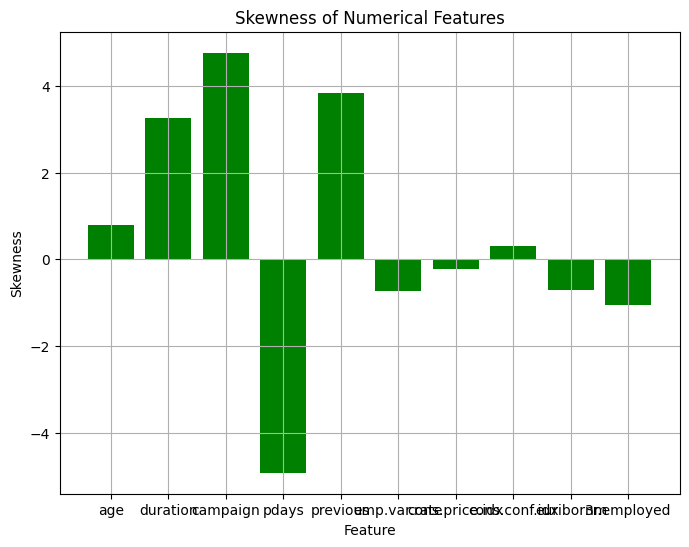

In [40]:
plot_data(skewness_kurtosis_df['Feature'], skewness_kurtosis_df['Skewness'], plot_type='bar',
          title="Skewness of Numerical Features", xlabel="Feature", ylabel="Skewness")

The **`Skewness plot`** shows the degree and direction of skew (asymmetry) in the distribution of each feature.

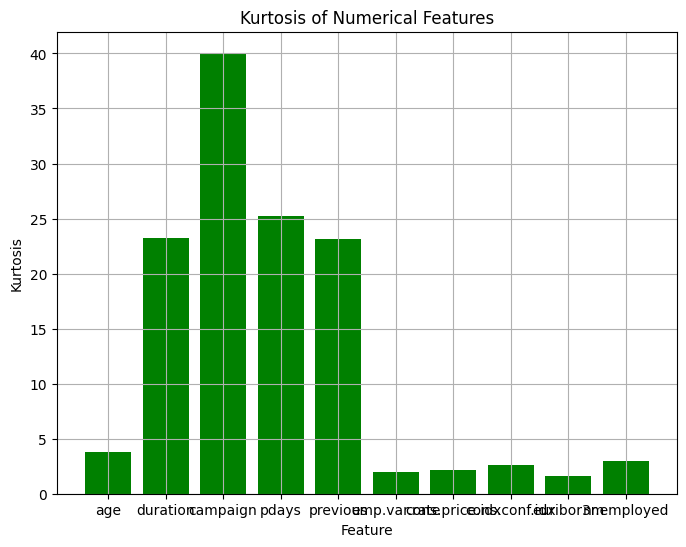

In [41]:
plot_data(skewness_kurtosis_df['Feature'], skewness_kurtosis_df['Kurtosis'], plot_type='bar',
          title="Kurtosis of Numerical Features", xlabel="Feature", ylabel="Kurtosis")

The **`Kurtosis plot`** illustrates the "tailedness" of the distribution, indicating how heavy or light the tails are compared to a normal distribution

### Anomalies
I will use The Median Absolute Deviation (MAD) is used to identify outliers by measuring the deviation of each data point from the median, offering robustness against data points that are extremely high or low. It's preferred over methods like standard deviation for outlier detection because it's less sensitive to outliers in the data itself, providing a more reliable identification of the truly anomalous values.

$$ \text{MAD} = \text{median}(\left| X_i - \text{median}(X) \right|) $$
Where:
- $X$ is the dataset
- $X_i$ is each individual data point in the dataset
- $\text{median}(X)$ is median of the dataset
- $|X_i - \text{median}(X)|$ is the absolute deviation of each data point from the median of the dataset.

$$M_i = \frac{0.6745 \cdot (X_i - \text{median}(X))}{\text{MAD}} $$
Where:
- $M_i$ is the Modified Z-score for each data point $X_i$
- $\text{median}(X)$ is the median of all data points
- $MAD$ is the median absolute deviation

The factor 0.6745 is used to make the Modified Z-score comparable to the standard Z-score under the assumption of normality

As a rule of thumb, we’ll use the score of 3.5 as our cut-off value; This means that every point with a score above 3.5 will be considered an outlier.

In [42]:
def mad_based_outlier(points, threshold=3.5):
  median = np.median(points)
  diff = np.abs(points - median)
  mad = np.median(diff)
  modiffed_z_score = 0.6754 * diff / mad
  return modiffed_z_score > threshold

In [43]:
numerical_cols = data.select_dtypes(include=[np.number]).columns

In [44]:
outliers_all = {col: mad_based_outlier(data[col]) for col in numerical_cols}

In [45]:
outliers_count = {col: sum(outliers) for col, outliers in outliers_all.items()}
outliers_count

{'age': 269,
 'duration': 2739,
 'campaign': 1777,
 'pdays': 1515,
 'previous': 5625,
 'emp.var.rate': 13498,
 'cons.price.idx': 0,
 'cons.conf.idx': 0,
 'euribor3m': 17086,
 'nr.employed': 1408}

It's important to note that some variables, such as `emp.var.rate` and `euribor3m`, have a very high number of detected outliers.

In contrast, variables like `cons.price.idx` and `cons.conf.idx` do not show any outliers, which could mean that these indices have less variation and are more stable across the dataset.

## Multivariate Analysis
This involves considerinf fetures in pairs, generating new features to examine their releshinships adn explorring correlation.

#### Correlation Matrix
The formula for Pearson correlation coefficient, often denoted as $r$, between two variables $X$ and $Y$ $$ r = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2 \sum_{i=1}^{n} (Y_i - \bar{Y})^2}} $$

In this formula:
- $\bar{X}$ and $\bar{Y}$ are the means of the $X$ and $Y$ variables, respectively.
- $X_i$ and $Y_i$ are individual sample points indexed with $i$.
- $n$ is the number of data points.




In [46]:
from scipy.stats import spearmanr, kendalltau

In [47]:
correlation_matrix = data.corr()

<ipython-input-47-19e8f3752a40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


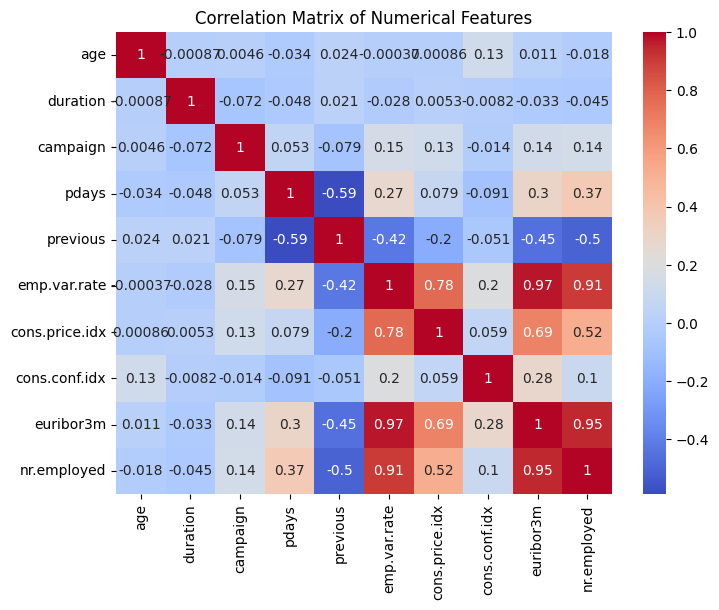

In [48]:
plot_heatmap(correlation_matrix, title="Correlation Matrix of Numerical Features")

- **Strong Correlations**:
  - Some features show strong correlations with each other. For example, `euribor3m` (Euribor 3 month rate) is highly correlated with `nr.employed` (number of employees), `emp.var.rate` (employment variation rate), and `cons.price.idx` (consumer price index). This suggests these economic indicators move in tandem, reflecting broader economic trends.

- **Weak or No Correlations**:
  - Other features, like `age`, `duration`, `campaign`, `pdays`, and `previous`, do not show strong correlations with most of the economic indicators. This indicates their influences are relatively independent of the economic context.

In [49]:
corr_spearman = data.corr(method='spearman')
corr_kendall = data.corr(method='kendall')

<ipython-input-49-2569255e0f81>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_spearman = data.corr(method='spearman')
<ipython-input-49-2569255e0f81>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_kendall = data.corr(method='kendall')


#### Spearman's Rank Correlation Coefficient Formula
$$ \rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)} $$
In this formula:
- $d_i$ represents the difference between the ranks of the corresponding values in the two data sets.
- $n$ is the number of observations.

It assesses how well the relationship between two variables can be described using a monotonic function. It is used when the data is not normally distributed or is ordinal.

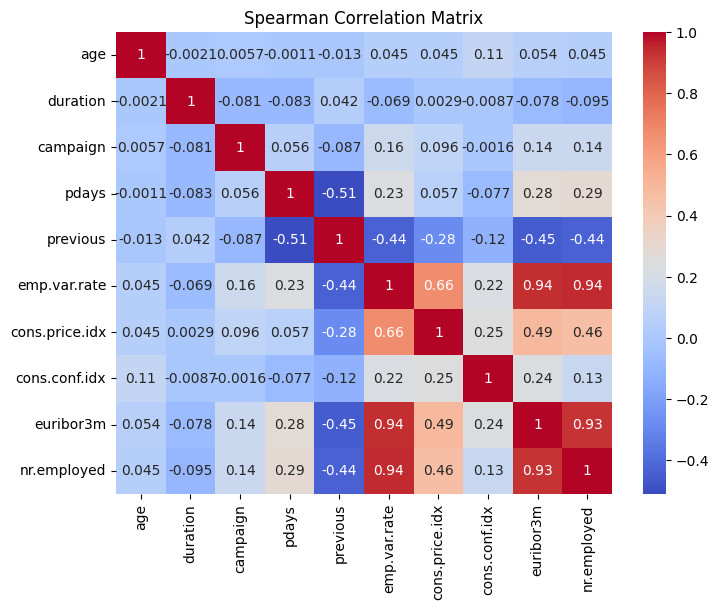

In [50]:
plot_heatmap(corr_spearman, title="Spearman Correlation Matrix")

- **Strong Positive Correlations**:
  - There are several pairs of economic indicators showing strong positive correlations. Notably, `emp.var.rate`, `euribor3m` and `nr.employed` all have correlation coefficients above 0.9 with each other, which is consistent with the expectation that these variables move together as they are all economic indicators.
- **Negative Correlations**:
  - `pdays` has a moderately strong negative correlation with `previous`, suggesting that as the number of days since the last contact increases, the number of previous contacts tends to be lower, which may indicate that repeated contacts happen in shorter intervals.
  - `emp.var.rate` also shows a negative correlation with `previous`, indicating that a higher number of previous contacts is associated with lower employment variation rates.
- **Weak or No Correlations**:
  - Variables such as `age`, `duration` of the last contact, `campaign` do not show strong correlations with the economic indicators. This suggests that the personal attributes and immediate campaign activities are less directly influenced by the broader economic context as represented by the economic indicators.

#### Kendall's Tau Correlation Coefficient Formula:
$$ \tau = \frac{2}{n(n-1)} \sum_{i < j} \text{sgn}(x_i - x_j) \cdot \text{sgn}(y_i - y_j) $$
In this formula:
- $sgn$ is the sign function, which takes the value -1, 0, or 1 depending on the sign of the argument.
- $(x_i, y_i)$ and $(x_j, y_j)$ are pairs of observations.
- $n$ is the number of observations.

It is particularly useful for small datasets and is robust against outliers. Kendall's Tau is often used when the data is ordinal or when the focus is on the order of data points rather than the magnitude of difference.


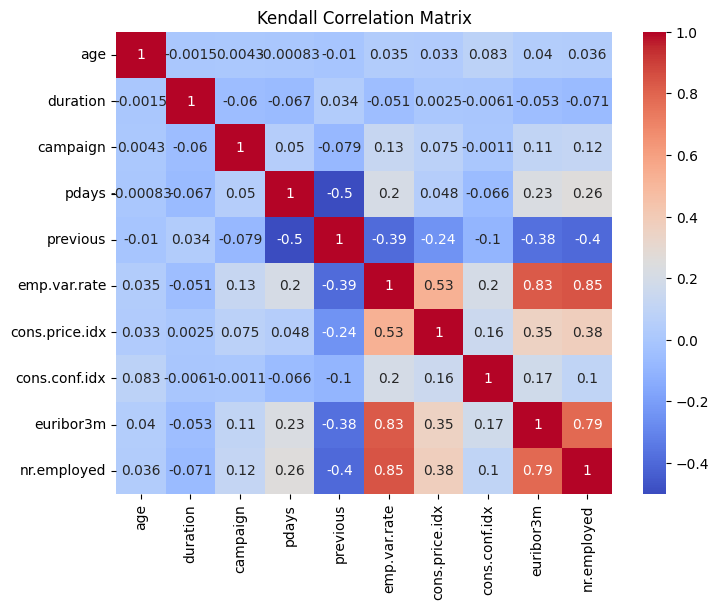

In [51]:
plot_heatmap(corr_kendall, title="Kendall Correlation Matrix")

- **Strong Positive Correlations:**
  - Similar to the Spearman matrix, `emp.var.rate`, `euribor3m`, and `nr.employed` are positively correlated, with `euribor3m` and `nr.employed` showing a high correlation coefficient around 0.79, which is strong for Kendall's Tau.
  - The strength of the correlations is generally lower in Kendall's Tau compared to Spearman's rank correlation, which is a characteristic of Kendall's measure as it tends to give a more conservative estimate.
- **Negative Correlations:**
  - `pdays` and `previous` show a strong negative correlation, as observed in the Spearman matrix, reinforcing the relationship between these two variables.
  - `emp.var.rate` and `previous` also show a negative correlation, although it's less strong than in the Spearman matrix.
- **Weak or No Correlations:**
  - Again `age`, `duration`, and `campaign` have weak or no correlations with the economic indicators in the Kendall matrix, which is consistent with the Spearman matrix and suggests independence from the economic context.

### Crosstab
This analysis is a statistical tool used to analyze and compare the frequency of occurrences between two categorical variables. It presents the data in a tabular form, known as a contingency table, which makes it easier to observe the relationship between the variables

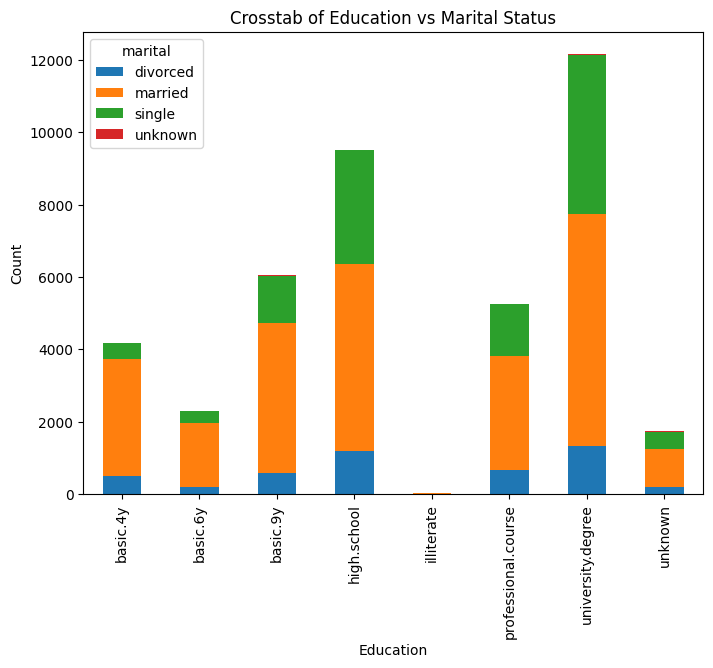

In [52]:
# Crosstab Analysis for Discrete Features
#Crosstab between 'education' and 'marital'
crosstab_example = pd.crosstab(data['education'], data['marital'])

# Visualizing the Crosstab
crosstab_example.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Crosstab of Education vs Marital Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

#### Observations:
- The majority of individuals across most education categories are `married`, followed by `single`, `divorced`, and a very small segment of `unknown` marital status.
- Those with a `university.degree` represent the largest group among all education levels, with a significant proportion of `single` individuals compared to other education categories.
- The `basic.9y` and `high.school` categories also have a considerable number of individuals, with `married` being the predominant marital status within these groups.
- The `illiterate` category has the fewest individuals, and within it, `marrie` is the predominant marital status.
- The `unknown` education category has a very small count, suggesting limited data for this group.


#### Data Distribution:
- The distribution indicates that higher education levels have a higher proportion of single individuals, which might suggest that people with higher education may marry later or less often.
- Lower education levels have a higher proportion of married individuals, which could indicate earlier or more prevalent marriage within these groups.

# Part 2 DP (20% max)
Prepare data to dimensionality reduction step


#### First Strategy for missing values
- `job` (330 `unknown`): Given the relatively small proportion of missing values, we could impute these with the most frequent category. The same with
- `marital` (80 `unknown`)even with smaller proportion of missing values
- `education` (1731 `unknown`) this is a larger number, but might still be reasonable for imputation



In [53]:
# For 'job' and 'marital', impute with the most frequent category
for col in ['job', 'marital']:
  most_frequent = data[col].value_counts().idxmax()
  data[col] = data[col].replace('unknown', most_frequent)

In [54]:
# For 'education', also impute with the most frequent category
most_frequent_education = data['education'].value_counts().idxmax()
data['education'] = data['education'].replace('unknown', most_frequent_education)

#### Second trategy for missing values
- `default` (8597 `unknown`) this is a significant portion of the dataset. Treating 'unknown' as a separate category might be the best approach here, as imputing such a large number of missing values could introduce substantial bias.

- `housing` and `loan` (990 `unknown` each) these could be treated similarly. Given that these values are not overwhelmingly large, we could consider imputation if there's a clear dominant category, or treat 'unknown' as a separate category.

In [55]:
# For 'default', 'housing', and 'loan', treat 'unknown' as a separate category
for col in ['default', 'housing', 'loan']:
  data[col] = data[col].replace('unknown', 'unknown_' + col)

In [56]:
data[categorical_col].apply(lambda x: x.value_counts()).T.stack()

job          admin.                 10752.0
             blue-collar             9254.0
             entrepreneur            1456.0
             housemaid               1060.0
             management              2924.0
             retired                 1720.0
             self-employed           1421.0
             services                3969.0
             student                  875.0
             technician              6743.0
             unemployed              1014.0
marital      divorced                4612.0
             married                25008.0
             single                 11568.0
education    basic.4y                4176.0
             basic.6y                2292.0
             basic.9y                6045.0
             high.school             9515.0
             illiterate                18.0
             professional.course     5243.0
             university.degree      13899.0
default      no                     32588.0
             unknown_default    

### Deal with outliers
From previus  results, it appears that outliers were detected in `duration`, `campaign`, `emp.var.rate`, and `cons.price.idx`

Let's consider the following strategies to handle these outliers:
- **Duration and Campaign**
  - Since outliers in these columns could represent rare but important events it might be better to cap them at a higher percentile

In [57]:
# Function to cap outliers based on the 95th percentile
def cap_outliers(series):
  cap = series.quantile(0.95)
  return np.where(series > cap, cap, series)

In [58]:
# Applying capping to 'duration' and 'campaign'
data['duration'] = cap_outliers(data['duration'])
data['campaign'] = cap_outliers(data['campaign'])

In [59]:
# Verifying the changes by checking the max values now
max_values_after_capping = data[['duration', 'campaign']].max()
max_values_after_capping

duration    752.65
campaign      7.00
dtype: float64

- **Emp.var.rate and Cons.price.idx:**
  - These are economic indicators and might have natural variations that are important for the analysis. Removing or altering these outliers could potentially distort the economic trends represented in the data

### Categorical Data Encoding
One-hot encoding is generally preferred for non-ordinal categorical data, especially when using models that don't natively handle categorical variables, i will use this approach

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
categorical_data = data[categorical_col]
numerical_data = data[numerical_cols]

In [62]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_data_encoded = encoder.fit_transform(categorical_data)
categorical_columns_encoded = encoder.get_feature_names_out(categorical_col)
categorical_data_encoded_df = pd.DataFrame(categorical_data_encoded, columns=categorical_columns_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [63]:
categorical_data_encoded_df.shape, categorical_data_encoded_df.head()

((41188, 52),
    job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
 0         0.0              0.0               0.0            1.0   
 1         0.0              0.0               0.0            0.0   
 2         0.0              0.0               0.0            0.0   
 3         1.0              0.0               0.0            0.0   
 4         0.0              0.0               0.0            0.0   
 
    job_management  job_retired  job_self-employed  job_services  job_student  \
 0             0.0          0.0                0.0           0.0          0.0   
 1             0.0          0.0                0.0           1.0          0.0   
 2             0.0          0.0                0.0           1.0          0.0   
 3             0.0          0.0                0.0           0.0          0.0   
 4             0.0          0.0                0.0           1.0          0.0   
 
    job_technician  ...  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
 0        

The encoded dataset now contains 52 columns, each representing a unique category from the original categorical variables.

### Preprocessing data
i will use `StandardScaler` from scikit-learn.
$$z = \frac{(x - \mu)}{\sigma}$$
Where:

$z$ is is the standardized value  

$x$ is the original value of the feature

$\mu$ is the mean of the feature

$\sigma$ is the standard deviation of the feature


This is a common choice for preparing data for PCA and many machine learning algorithms

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)
numerical_data_scaled_df  = pd.DataFrame(numerical_data_scaled, columns=numerical_cols)
numerical_data_scaled_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,0.100735,-0.783956,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,1.628993,-0.478316,-0.783956,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.290186,-0.080218,-0.783956,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,-0.002309,-0.467975,-0.783956,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,1.533034,0.338559,-0.783956,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


The numerical data has been successfully standardized. Each feature now has a mean of approximately 0 and a standard deviation of 1.

In [91]:
summary_statistics = numerical_data_scaled_df.describe()

# Checking the mean and standard deviation of the scaled data
mean_std = summary_statistics.loc[['mean', 'std']]

mean_std

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
mean,-1.880382e-16,-2.139150e-17,6.313942e-17,-2.580781e-16,5.520386e-18,7.797546e-17,-3.315820e-14,-1.352495e-16,0.000000,-1.024860e-14
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012,1.000012e+00


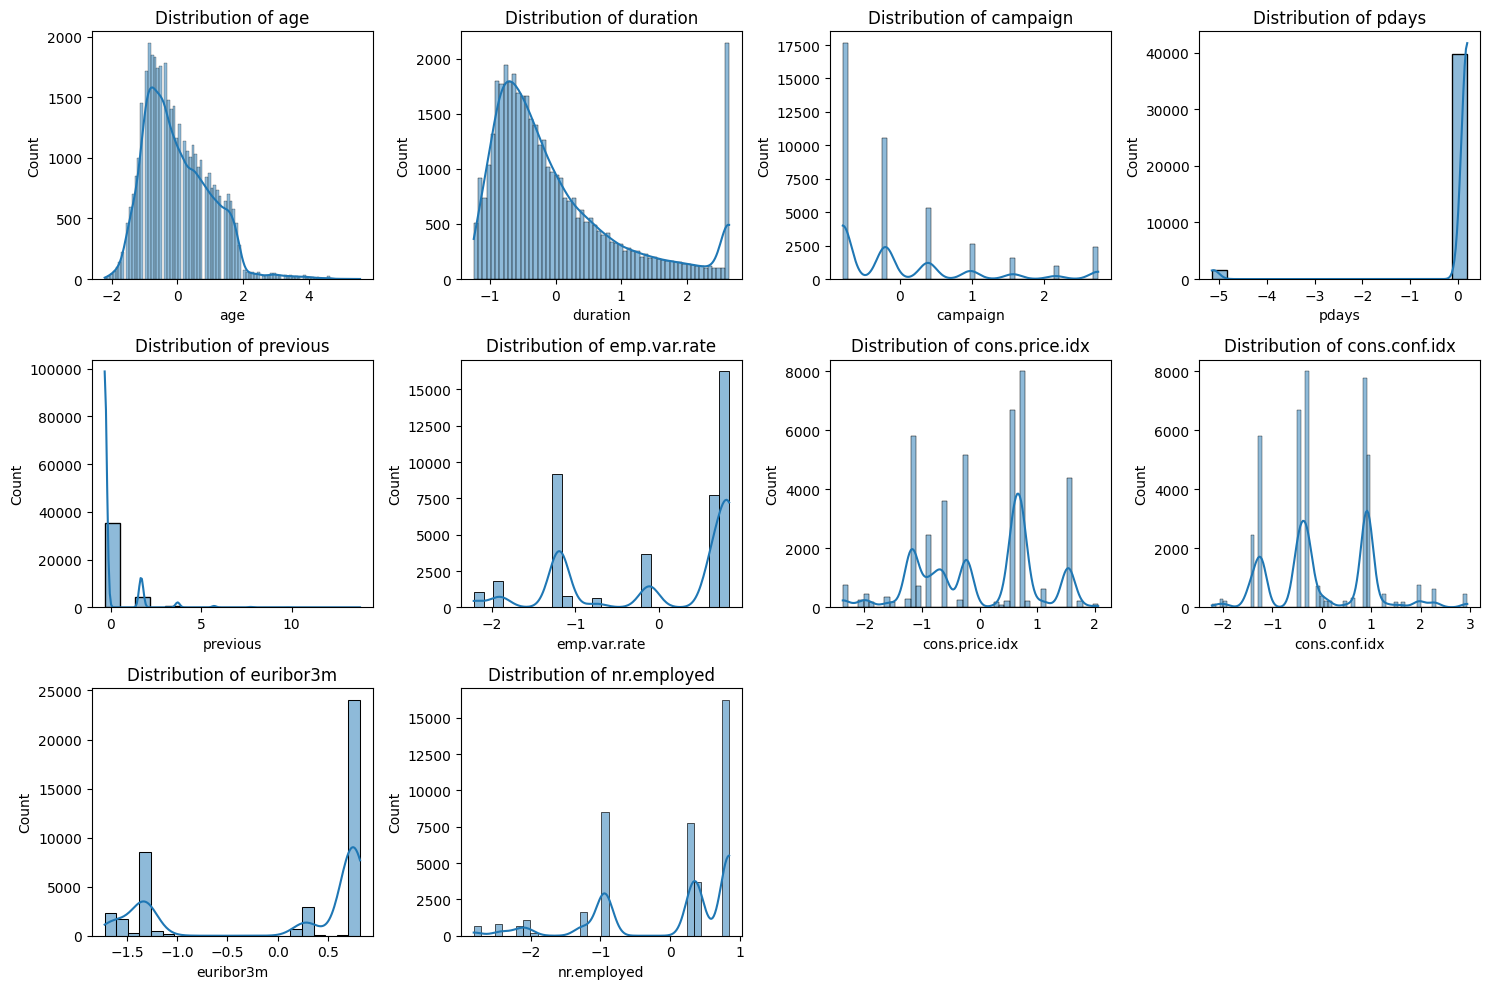

In [92]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_data_scaled_df.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(numerical_data_scaled_df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

## Part 3: DR (25% max)
Use different dimensionality reduction techniques and show results


### PCA (Principal Component Analysis)
I will start with PCA which is a linear dimensionality reduction technique. PCA identifies the axes along which the variance of the data is maximized

In [66]:
from sklearn.decomposition import PCA

In [67]:
# combining the scaled numerical data
complete_data = pd.concat([numerical_data_scaled_df, categorical_data_encoded_df], axis=1)
complete_data.shape

(41188, 62)

In [68]:
pca = PCA(n_components=2)  # Starting with 2 components for visualization purposes
pca_result = pca.fit_transform(complete_data)

In [69]:
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

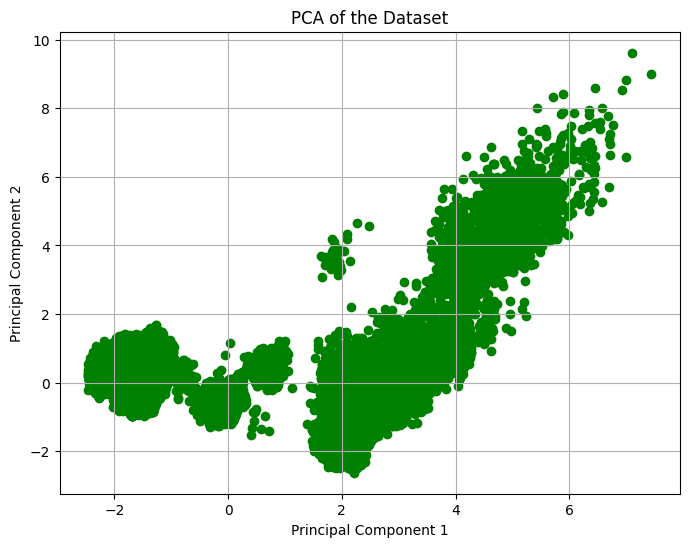

In [70]:
plot_data(pca_df['PCA1'], pca_df['PCA2'], title='PCA of the Dataset', xlabel='Principal Component 1', ylabel='Principal Component 2')

In [71]:
explained_variance = pca.explained_variance_ratio_
explained_variance_sum = np.sum(explained_variance)
explained_variance, explained_variance_sum

(array([0.26184104, 0.09153783]), 0.3533788699914853)

The explained variance for the two components is approximately 26.18% and 9.15%, respectively summing up to about 35.34%. This means that the first two principal components capture around 35.34% of the variance in the data.

In [72]:
pca_full = PCA()
pca_full.fit(complete_data)

PCA()

In [73]:
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

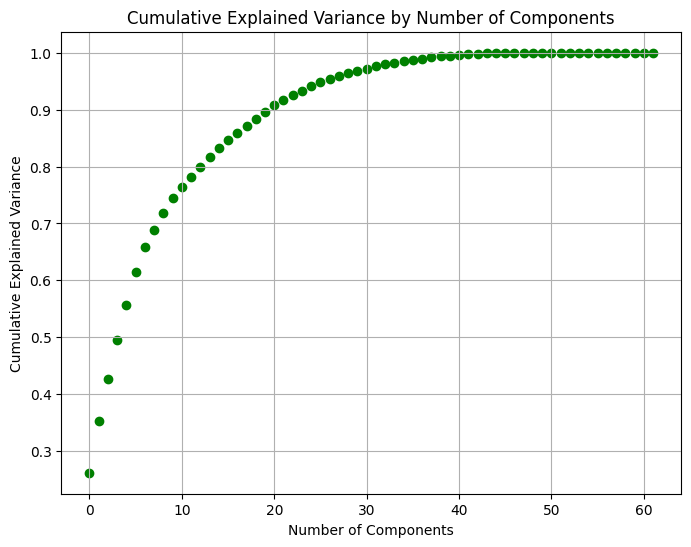

In [74]:
plot_data(range(len(cumulative_explained_variance)),cumulative_explained_variance, title='Cumulative Explained Variance by Number of Components', xlabel='Number of Components', ylabel='Cumulative Explained Variance')

In [75]:
cumulative_explained_variance[:20]

array([0.26184104, 0.35337887, 0.42715654, 0.49503826, 0.55703831,
       0.61399439, 0.65809523, 0.68849437, 0.71820095, 0.74423961,
       0.76371088, 0.78213539, 0.79939274, 0.81597825, 0.83211044,
       0.84611559, 0.85923064, 0.8719002 , 0.88431396, 0.8965325 ])

From the plot and the values, we can observe:
- The first component alone captures about 26.18% of the variance.
- The first two components together capture about 35.34%.
- To capture more than 50% of the variance, we need around 5 components.
- With 10 components, we capture approximately 74.42% of the variance.
- To capture around 90% of the variance, about 20 components are needed

### t-SNE (t-distributed Stochastic Neighbor Embedding)
t-SNE is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data. Non-linear dimensionality reduction means that the algorithm allows us to separate data that cannot be separated by a straight line.

In [76]:
from sklearn.manifold import TSNE

In [77]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(complete_data.sample(1000))  # Using a sample for faster computation

In [78]:
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

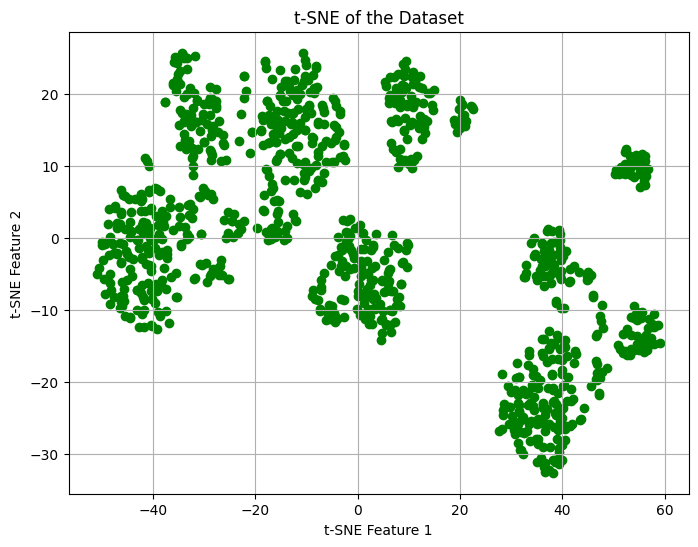

In [79]:
plot_data(tsne_df['TSNE1'], tsne_df['TSNE2'], title='t-SNE of the Dataset', xlabel='t-SNE Feature 1', ylabel='t-SNE Feature 2')

I applied t-SNE to the dataset, I used a sample of 1,000 data points for faster computation
- **clusters** the plot shows several clusters of points. These clusters might represent patterns or groupings inherent in the data
- **Density** the density of the points within each cluster varies. Some clusters are tight with points closely packed these clusters are very similar to each other
- **Separation** clear separation between most clusters which suggests that t-SNE has effectively modeled

### SVD

In [80]:
from sklearn.decomposition import TruncatedSVD

In [81]:
svd = TruncatedSVD(n_components=2,random_state=42)
svd_result = svd.fit_transform(complete_data)
svd_full = TruncatedSVD().fit(complete_data)

In [82]:
svd_df = pd.DataFrame(data=svd_result, columns=['SVD1','SVD2'])

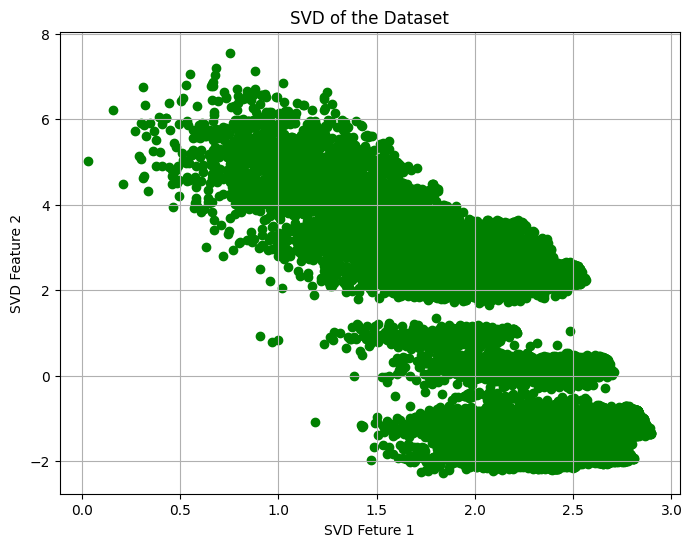

In [83]:
plot_data(svd_df['SVD1'],svd_df['SVD2'], title='SVD of the Dataset', xlabel='SVD Feture 1', ylabel='SVD Feature 2')

- the distribution of points along the SVD Feature 1 axis is quite wide suggesting that this component captures a significant variation in the data
- The second component, SVD Feature 2, appears to capture less variability than the first as indicated by the narrower spread of points along this axis

In [84]:
singular_values = svd.singular_values_
singular_values_ratio = singular_values / np.sum(singular_values)
singular_values, singular_values_ratio

(array([466.09137969, 411.84761166]), array([0.53089268, 0.46910732]))

- the `singular` values [466.09137969, 411.84761166] indicate the importance or "strength" of each corresponding SVD component first component is slightly more dominant than the second
- the `ratios` [0.53089268, 0.46910732] show the proportion of the total variance explained by each component together they sum up to 1 this implies that both components are quite significant in explaining the variability of the data

### Explained Variance Calculation

#### PCA

In [85]:
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
cumulative_explained_variance

array([0.26184104, 0.35337887, 0.42715654, 0.49503826, 0.55703831,
       0.61399439, 0.65809523, 0.68849437, 0.71820095, 0.74423961,
       0.76371088, 0.78213539, 0.79939274, 0.81597825, 0.83211044,
       0.84611559, 0.85923064, 0.8719002 , 0.88431396, 0.8965325 ,
       0.90778024, 0.91707497, 0.92541175, 0.93316122, 0.9406453 ,
       0.94793255, 0.95368895, 0.95889881, 0.96354486, 0.96786545,
       0.97209174, 0.97627651, 0.97961227, 0.982591  , 0.98525992,
       0.98753059, 0.98972202, 0.99177118, 0.99346514, 0.99499904,
       0.99620778, 0.99730971, 0.99828697, 0.99906829, 0.99936786,
       0.99964021, 0.99986238, 0.99996093, 0.9999931 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

27

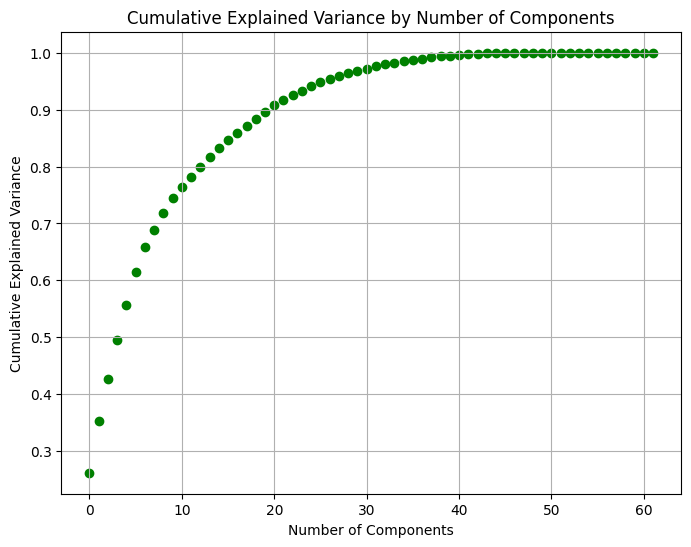

In [86]:
plot_data(range(len(cumulative_explained_variance)), cumulative_explained_variance, title='Cumulative Explained Variance by Number of Components', xlabel='Number of Components', ylabel='Cumulative Explained Variance')
# Select the number of components that captures the desired amount of total variance
# Capture 95% of the variance:
n_components_95 = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1
n_components_95

For me the best number fro componnents is 27

#### SVD

In [87]:
svd_full = TruncatedSVD(n_components=min(data.shape)-1)
svd_full.fit(complete_data)
singular_values = svd_full.singular_values_
explained_variance_svd = (singular_values ** 2) / np.sum(singular_values ** 2)
explained_variance_svd

array([0.27479682, 0.21455699, 0.0747931 , 0.06071257, 0.05591606,
       0.05099954, 0.04692612, 0.0363068 , 0.02503794, 0.02443993,
       0.02145363, 0.01568297, 0.01513599, 0.01421314, 0.01329802,
       0.01279965, 0.01146457, 0.01080568, 0.01043831, 0.01022216])

In [88]:
cumulative_explained_variance_svd = np.cumsum(explained_variance_svd)
cumulative_explained_variance_svd

array([0.27479682, 0.48935381, 0.56414691, 0.62485949, 0.68077555,
       0.73177509, 0.77870122, 0.81500801, 0.84004595, 0.86448588,
       0.88593951, 0.90162248, 0.91675848, 0.93097161, 0.94426963,
       0.95706928, 0.96853385, 0.97933953, 0.98977784, 1.        ])

In [89]:
cumulative_variance_svd_95 = np.where(cumulative_explained_variance_svd >= 0.95)[0][0] + 1
cumulative_variance_svd_95

16

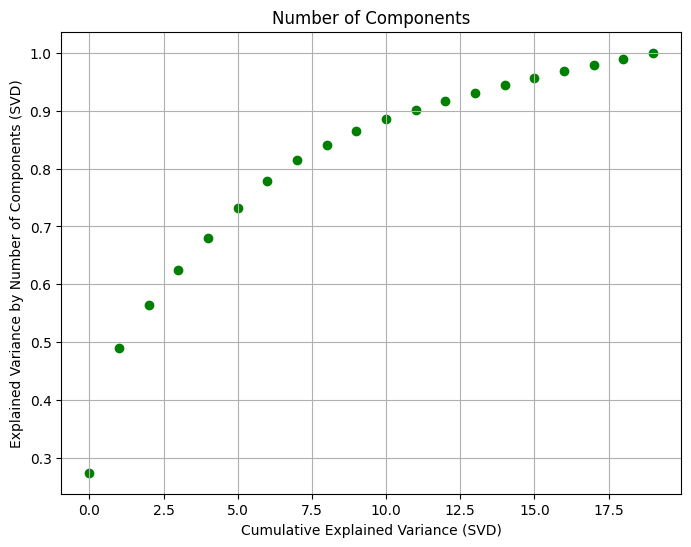

In [90]:
plot_data(range(len(cumulative_explained_variance_svd)), cumulative_explained_variance_svd, title='Number of Components', xlabel='Cumulative Explained Variance (SVD)', ylabel='Explained Variance by Number of Components (SVD)')

In summary neither PCA nor SVD is universally — the best choice depends on my specific goals data characteristics and the downstream tasks. If PCA with 27 components and SVD with 17 components both meet my criteria for variance explained
I might try both in the context of my final task and choose the one that yields better results

# References
- [A quick explanation of an EDA task](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- [Data Types in Statistics](https://towardsdatascience.com/data-types-in-statistics-347e152e8bee)
- [Overview of various plot types](https://python-graph-gallery.com/)